In [1]:
# Import des bibliothéques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api
from scipy.stats import pearsonr

from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')


# I) DECOUVERTE, MODIFICATIONS ET NETTOYAGE DU JEU DE DONNEES

In [2]:
# Import des données

df = pd.read_csv(r"C:\Users\Anwender\Downloads\eco2mix-regional-cons-def.csv", sep=';')
display(df.head())
print('Types des données:')
display(df.dtypes)
print('\nNombre de modalités par variable:')
df.nunique()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,44,Grand Est,Données consolidées,2021-02-22,02:00,2021-02-22T02:00:00+01:00,4927.0,288.0,5928.0,1704.0,...,0.00,20.78,44.35,2.70,55.19,NaN,NaN,NaN,NaN,NaN
1,44,Grand Est,Données consolidées,2021-02-22,02:30,2021-02-22T02:30:00+01:00,4866.0,288.0,5932.0,1718.0,...,0.00,21.00,44.26,2.69,54.36,NaN,NaN,NaN,NaN,NaN
2,44,Grand Est,Données consolidées,2021-02-22,05:00,2021-02-22T05:00:00+01:00,4777.0,373.0,6017.0,1267.0,...,0.00,20.89,43.22,2.78,55.19,NaN,NaN,NaN,NaN,NaN
3,44,Grand Est,Données consolidées,2021-02-22,06:00,2021-02-22T06:00:00+01:00,5188.0,563.0,5973.0,1121.0,...,0.00,19.41,43.61,2.56,55.19,NaN,NaN,NaN,NaN,NaN
4,44,Grand Est,Données consolidées,2021-02-22,09:30,2021-02-22T09:30:00+01:00,6092.0,934.0,6070.0,1224.0,...,11.73,19.14,50.50,2.22,56.02,NaN,NaN,NaN,NaN,NaN


Types des données:


Code INSEE région        int64
Région                  object
Nature                  object
Date                    object
Heure                   object
Date - Heure            object
Consommation (MW)      float64
Thermique (MW)         float64
Nucléaire (MW)         float64
Eolien (MW)            float64
Solaire (MW)           float64
Hydraulique (MW)       float64
Pompage (MW)           float64
Bioénergies (MW)       float64
Ech. physiques (MW)    float64
Stockage batterie      float64
Déstockage batterie    float64
Eolien terrestre       float64
Eolien offshore        float64
TCO Thermique (%)      float64
TCH Thermique (%)      float64
TCO Nucléaire (%)      float64
TCH Nucléaire (%)      float64
TCO Eolien (%)         float64
TCH Eolien (%)         float64
TCO Solaire (%)        float64
TCH Solaire (%)        float64
TCO Hydraulique (%)    float64
TCH Hydraulique (%)    float64
TCO Bioénergies (%)    float64
TCH Bioénergies (%)    float64
Column 30              float64
dtype: o


Nombre de modalités par variable:


Code INSEE région          12
Région                     12
Nature                      2
Date                     3438
Heure                      48
Date - Heure           165004
Consommation (MW)       13284
Thermique (MW)           4022
Nucléaire (MW)          13376
Eolien (MW)              4638
Solaire (MW)             2478
Hydraulique (MW)         7397
Pompage (MW)             2374
Bioénergies (MW)          312
Ech. physiques (MW)     24078
Stockage batterie       20571
Déstockage batterie      5108
Eolien terrestre         8406
Eolien offshore         38005
TCO Thermique (%)        7078
TCH Thermique (%)        9208
TCO Nucléaire (%)       36959
TCH Nucléaire (%)       10091
TCO Eolien (%)           8167
TCH Eolien (%)           9157
TCO Solaire (%)          5081
TCH Solaire (%)          8274
TCO Hydraulique (%)      8370
TCH Hydraulique (%)      6661
TCO Bioénergies (%)       661
TCH Bioénergies (%)      2440
Column 30                   0
dtype: int64

In [3]:
display(df.shape)
df.columns.tolist()

(1980288, 32)

['Code INSEE région',
 'Région',
 'Nature',
 'Date',
 'Heure',
 'Date - Heure',
 'Consommation (MW)',
 'Thermique (MW)',
 'Nucléaire (MW)',
 'Eolien (MW)',
 'Solaire (MW)',
 'Hydraulique (MW)',
 'Pompage (MW)',
 'Bioénergies (MW)',
 'Ech. physiques (MW)',
 'Stockage batterie',
 'Déstockage batterie',
 'Eolien terrestre',
 'Eolien offshore',
 'TCO Thermique (%)',
 'TCH Thermique (%)',
 'TCO Nucléaire (%)',
 'TCH Nucléaire (%)',
 'TCO Eolien (%)',
 'TCH Eolien (%)',
 'TCO Solaire (%)',
 'TCH Solaire (%)',
 'TCO Hydraulique (%)',
 'TCH Hydraulique (%)',
 'TCO Bioénergies (%)',
 'TCH Bioénergies (%)',
 'Column 30']

In [4]:
# Création des colonnes année et mois

df['Date'] = pd.to_datetime(df['Date'])
df['Année']=df['Date'].dt.year
df['Mois']=df['Date'].dt.month
df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Année,Mois
0,44,Grand Est,Données consolidées,2021-02-22,02:00,2021-02-22T02:00:00+01:00,4927.0,288.0,5928.0,1704.0,...,44.35,2.70,55.19,NaN,NaN,NaN,NaN,NaN,2021,2
1,44,Grand Est,Données consolidées,2021-02-22,02:30,2021-02-22T02:30:00+01:00,4866.0,288.0,5932.0,1718.0,...,44.26,2.69,54.36,NaN,NaN,NaN,NaN,NaN,2021,2
2,44,Grand Est,Données consolidées,2021-02-22,05:00,2021-02-22T05:00:00+01:00,4777.0,373.0,6017.0,1267.0,...,43.22,2.78,55.19,NaN,NaN,NaN,NaN,NaN,2021,2
3,44,Grand Est,Données consolidées,2021-02-22,06:00,2021-02-22T06:00:00+01:00,5188.0,563.0,5973.0,1121.0,...,43.61,2.56,55.19,NaN,NaN,NaN,NaN,NaN,2021,2
4,44,Grand Est,Données consolidées,2021-02-22,09:30,2021-02-22T09:30:00+01:00,6092.0,934.0,6070.0,1224.0,...,50.50,2.22,56.02,NaN,NaN,NaN,NaN,NaN,2021,2


In [5]:
# Suppression des lignes avec les données pour les années 2021 et 2022 (les données pas definitives, pas fiables)

df = df[(df['Année'] != 2021) &(df['Année'] != 2022)]
df['Année'].value_counts()

2016    210816
2020    210816
2014    210240
2013    210240
2015    210240
2017    210240
2019    210240
2018    210240
Name: Année, dtype: int64

In [6]:
# Vérification du taux de NANs par variable

df.isna().mean()

Code INSEE région      0.000000
Région                 0.000000
Nature                 0.000000
Date                   0.000000
Heure                  0.000000
Date - Heure           0.000000
Consommation (MW)      0.000007
Thermique (MW)         0.000007
Nucléaire (MW)         0.416671
Eolien (MW)            0.000064
Solaire (MW)           0.000007
Hydraulique (MW)       0.000007
Pompage (MW)           0.437490
Bioénergies (MW)       0.000007
Ech. physiques (MW)    0.000007
Stockage batterie      1.000000
Déstockage batterie    1.000000
Eolien terrestre       1.000000
Eolien offshore        1.000000
TCO Thermique (%)      0.874743
TCH Thermique (%)      0.874743
TCO Nucléaire (%)      0.926934
TCH Nucléaire (%)      0.926934
TCO Eolien (%)         0.874743
TCH Eolien (%)         0.874743
TCO Solaire (%)        0.874743
TCH Solaire (%)        0.874743
TCO Hydraulique (%)    0.874743
TCH Hydraulique (%)    0.874743
TCO Bioénergies (%)    0.874743
TCH Bioénergies (%)    0.874743
Column 3

In [7]:
# Suppression des colonnes non significatives, des colonnes avec 100% NANs

df.drop(columns=['Nature','Column 30','Date - Heure', 'Stockage batterie','Déstockage batterie','Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)','TCO Nucléaire (%)','TCO Eolien (%)','TCO Solaire (%)','TCO Hydraulique (%)','TCO Bioénergies (%)'], inplace=True)
df.head()


,Code INSEE région,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Bioénergies (MW),Ech. physiques (MW),TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois
54105,44,Grand Est,2014-06-20,04:00,4051.0,37.0,7944.0,258.0,0.0,505.0,...,53.0,-4212.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54107,44,Grand Est,2014-06-20,06:30,4353.0,39.0,8970.0,183.0,7.0,727.0,...,53.0,-5102.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54109,44,Grand Est,2014-06-20,09:00,5135.0,39.0,9266.0,118.0,91.0,1172.0,...,55.0,-5605.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54111,44,Grand Est,2014-06-20,17:30,4834.0,38.0,9061.0,184.0,177.0,704.0,...,54.0,-5385.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54113,44,Grand Est,2014-06-20,20:30,4546.0,40.0,9001.0,268.0,20.0,721.0,...,56.0,-5559.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6


In [8]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois
count,1.683072e+06,1.683060e+06,1.683060e+06,981785.00000,1.682964e+06,1.683060e+06,1.683060e+06,946745.000000,1.683060e+06,1.683060e+06,210816.000000,122976.000000,210816.000000,210816.000000,210816.000000,210816.000000,1.683072e+06,1.683072e+06
mean,4.991667e+01,4.491236e+03,3.742477e+02,6326.01627,2.384455e+02,8.319757e+01,6.042936e+02,-118.431811,8.148997e+01,-5.143107e+02,21.015155,63.004338,26.250086,13.715611,27.472536,53.702024,2.016501e+03,6.522930e+00
std,2.564001e+01,2.173764e+03,5.407114e+02,3053.77645,3.992384e+02,2.027177e+02,1.033438e+03,316.984291,4.493691e+01,4.384275e+03,19.073047,20.357661,23.365209,20.565643,29.133067,13.150109,2.291438e+00,3.448704e+00
min,1.100000e+01,8.950000e+02,-8.300000e+01,-144.00000,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2570.000000,4.000000e+00,-1.221900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,13.990000,2.013000e+03,1.000000e+00
25%,2.775000e+01,2.782000e+03,2.400000e+01,3642.00000,2.500000e+01,0.000000e+00,4.000000e+00,-16.000000,4.600000e+01,-4.285000e+03,3.890000,47.480000,6.930000,0.000000,11.470000,44.480000,2.015000e+03,4.000000e+00
50%,4.800000e+01,4.103000e+03,1.510000e+02,6267.00000,9.800000e+01,0.000000e+00,5.600000e+01,0.000000,7.100000e+01,5.030000e+02,16.830000,61.760000,19.180000,0.290000,25.000000,53.230000,2.016500e+03,7.000000e+00
75%,7.525000e+01,5.734000e+03,4.780000e+02,8834.00000,2.790000e+02,6.100000e+01,8.920000e+02,0.000000,1.140000e+02,2.230000e+03,33.020000,80.090000,40.040000,23.202500,40.820000,64.520000,2.019000e+03,1.000000e+01
max,9.300000e+01,1.533800e+04,4.293000e+03,13632.00000,4.351000e+03,2.224000e+03,8.388000e+03,0.000000,5.480000e+02,1.395900e+04,92.800000,102.010000,117.980000,112.430000,2550.000000,243.560000,2.020000e+03,1.200000e+01


In [9]:
#suppression du pas 1/2 heure pour passer au pas horaire
columnnum = len(df.columns)-2
df.iloc[:, 4:columnnum] = df.iloc[:, 4:columnnum] / 2
df.head()

,Code INSEE région,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Bioénergies (MW),Ech. physiques (MW),TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois
54105,44,Grand Est,2014-06-20,04:00,2025.5,18.5,3972.0,129.0,0.0,252.5,...,26.5,-2106.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54107,44,Grand Est,2014-06-20,06:30,2176.5,19.5,4485.0,91.5,3.5,363.5,...,26.5,-2551.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54109,44,Grand Est,2014-06-20,09:00,2567.5,19.5,4633.0,59.0,45.5,586.0,...,27.5,-2802.5,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54111,44,Grand Est,2014-06-20,17:30,2417.0,19.0,4530.5,92.0,88.5,352.0,...,27.0,-2692.5,NaN,NaN,NaN,NaN,NaN,NaN,2014,6
54113,44,Grand Est,2014-06-20,20:30,2273.0,20.0,4500.5,134.0,10.0,360.5,...,28.0,-2779.5,NaN,NaN,NaN,NaN,NaN,NaN,2014,6


In [10]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois
count,1.683072e+06,1.683060e+06,1.683060e+06,981785.000000,1.682964e+06,1.683060e+06,1.683060e+06,946745.000000,1.683060e+06,1.683060e+06,210816.000000,122976.000000,210816.000000,210816.000000,210816.000000,210816.000000,1.683072e+06,1.683072e+06
mean,4.991667e+01,2.245618e+03,1.871239e+02,3163.008135,1.192227e+02,4.159879e+01,3.021468e+02,-59.215906,4.074498e+01,-2.571554e+02,10.507577,31.502169,13.125043,6.857806,13.736268,26.851012,2.016501e+03,6.522930e+00
std,2.564001e+01,1.086882e+03,2.703557e+02,1526.888225,1.996192e+02,1.013588e+02,5.167192e+02,158.492146,2.246845e+01,2.192137e+03,9.536523,10.178830,11.682604,10.282822,14.566534,6.575054,2.291438e+00,3.448704e+00
min,1.100000e+01,4.475000e+02,-4.150000e+01,-72.000000,-3.000000e+00,-1.150000e+01,-3.000000e+00,-1285.000000,2.000000e+00,-6.109500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,6.995000,2.013000e+03,1.000000e+00
25%,2.775000e+01,1.391000e+03,1.200000e+01,1821.000000,1.250000e+01,0.000000e+00,2.000000e+00,-8.000000,2.300000e+01,-2.142500e+03,1.945000,23.740000,3.465000,0.000000,5.735000,22.240000,2.015000e+03,4.000000e+00
50%,4.800000e+01,2.051500e+03,7.550000e+01,3133.500000,4.900000e+01,0.000000e+00,2.800000e+01,0.000000,3.550000e+01,2.515000e+02,8.415000,30.880000,9.590000,0.145000,12.500000,26.615000,2.016500e+03,7.000000e+00
75%,7.525000e+01,2.867000e+03,2.390000e+02,4417.000000,1.395000e+02,3.050000e+01,4.460000e+02,0.000000,5.700000e+01,1.115000e+03,16.510000,40.045000,20.020000,11.601250,20.410000,32.260000,2.019000e+03,1.000000e+01
max,9.300000e+01,7.669000e+03,2.146500e+03,6816.000000,2.175500e+03,1.112000e+03,4.194000e+03,0.000000,2.740000e+02,6.979500e+03,46.400000,51.005000,58.990000,56.215000,1275.000000,121.780000,2.020000e+03,1.200000e+01


In [11]:
# Traitement des NANs (remplacement par la médiane, pour éviter l'influence des valeurs extrêmes sur la moyenne)
medians = df.median()
df = df.fillna(medians)
df.isna().mean()

Code INSEE région      0.0
Région                 0.0
Date                   0.0
Heure                  0.0
Consommation (MW)      0.0
Thermique (MW)         0.0
Nucléaire (MW)         0.0
Eolien (MW)            0.0
Solaire (MW)           0.0
Hydraulique (MW)       0.0
Pompage (MW)           0.0
Bioénergies (MW)       0.0
Ech. physiques (MW)    0.0
TCH Thermique (%)      0.0
TCH Nucléaire (%)      0.0
TCH Eolien (%)         0.0
TCH Solaire (%)        0.0
TCH Hydraulique (%)    0.0
TCH Bioénergies (%)    0.0
Année                  0.0
Mois                   0.0
dtype: float64

In [12]:
# Rajout des colonnes Energie verte et Production Totale
df['Energie verte'] = df['Eolien (MW)']+df['Solaire (MW)']+df['Hydraulique (MW)']+df['Bioénergies (MW)']
df['Production totale'] = df['Thermique (MW)']+df['Nucléaire (MW)']-df['Pompage (MW)']+df['Eolien (MW)']+df['Solaire (MW)']+df['Hydraulique (MW)']+df['Bioénergies (MW)']
df.head()


,Code INSEE région,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois,Energie verte,Production totale
54105,44,Grand Est,2014-06-20,04:00,2025.5,18.5,3972.0,129.0,0.0,252.5,...,8.415,30.88,9.59,0.145,12.5,26.615,2014,6,408.0,4666.0
54107,44,Grand Est,2014-06-20,06:30,2176.5,19.5,4485.0,91.5,3.5,363.5,...,8.415,30.88,9.59,0.145,12.5,26.615,2014,6,485.0,5251.5
54109,44,Grand Est,2014-06-20,09:00,2567.5,19.5,4633.0,59.0,45.5,586.0,...,8.415,30.88,9.59,0.145,12.5,26.615,2014,6,718.0,5370.5
54111,44,Grand Est,2014-06-20,17:30,2417.0,19.0,4530.5,92.0,88.5,352.0,...,8.415,30.88,9.59,0.145,12.5,26.615,2014,6,559.5,5109.0
54113,44,Grand Est,2014-06-20,20:30,2273.0,20.0,4500.5,134.0,10.0,360.5,...,8.415,30.88,9.59,0.145,12.5,26.615,2014,6,532.5,5053.0


In [13]:
# Création de la base de données transformée
#df.to_csv(r"C:\Users\Administrateur\Downloads\eco2mix-regional-cons-def_transformed.csv", index=False, header=True)
#df_tr = pd.read_csv(r"C:\Users\Administrateur\Downloads\eco2mix-regional-cons-def_transformed.csv")
#df_tr.head()

In [14]:
# Analyse statistique des variables numériques
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois,Energie verte,Production totale
count,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06
mean,4.991667e+01,2.245617e+03,1.871231e+02,3.150713e+03,1.192182e+02,4.159849e+01,3.021448e+02,-3.330954e+01,4.074495e+01,-2.571517e+02,8.677109e+00,3.092546e+01,1.003279e+01,9.858237e-01,1.265485e+01,2.664456e+01,2.016501e+03,6.522930e+00,5.037065e+02,3.874852e+03
std,2.564001e+01,1.086878e+03,2.703549e+02,1.166266e+03,1.996136e+02,1.013585e+02,5.167179e+02,1.224461e+02,2.246838e+01,2.192130e+03,3.445466e+00,2.756169e+00,4.297043e+00,4.263970e+00,5.171537e+00,2.328324e+00,2.291438e+00,3.448704e+00,5.727936e+02,1.475214e+03
min,1.100000e+01,4.475000e+02,-4.150000e+01,-7.200000e+01,-3.000000e+00,-1.150000e+01,-3.000000e+00,-1.285000e+03,2.000000e+00,-6.109500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.995000e+00,2.013000e+03,1.000000e+00,8.500000e+00,1.670000e+02
25%,2.775000e+01,1.391000e+03,1.200000e+01,2.760000e+03,1.250000e+01,0.000000e+00,2.000000e+00,-5.000000e-01,2.300000e+01,-2.142500e+03,8.415000e+00,3.088000e+01,9.590000e+00,1.450000e-01,1.250000e+01,2.661500e+01,2.015000e+03,4.000000e+00,9.750000e+01,3.196500e+03
50%,4.800000e+01,2.051500e+03,7.550000e+01,3.133500e+03,4.900000e+01,0.000000e+00,2.800000e+01,0.000000e+00,3.550000e+01,2.515000e+02,8.415000e+00,3.088000e+01,9.590000e+00,1.450000e-01,1.250000e+01,2.661500e+01,2.016500e+03,7.000000e+00,2.475000e+02,3.434000e+03
75%,7.525000e+01,2.867000e+03,2.390000e+02,3.444000e+03,1.395000e+02,3.050000e+01,4.460000e+02,0.000000e+00,5.700000e+01,1.115000e+03,8.415000e+00,3.088000e+01,9.590000e+00,1.450000e-01,1.250000e+01,2.661500e+01,2.019000e+03,1.000000e+01,7.370000e+02,4.359000e+03
max,9.300000e+01,7.669000e+03,2.146500e+03,6.816000e+03,2.175500e+03,1.112000e+03,4.194000e+03,0.000000e+00,2.740000e+02,6.979500e+03,4.640000e+01,5.100500e+01,5.899000e+01,5.621500e+01,1.275000e+03,1.217800e+02,2.020000e+03,1.200000e+01,4.378000e+03,1.107800e+04


# II) MATRICES DE CORRELATION ET GRAPHES EXPLICATIFS

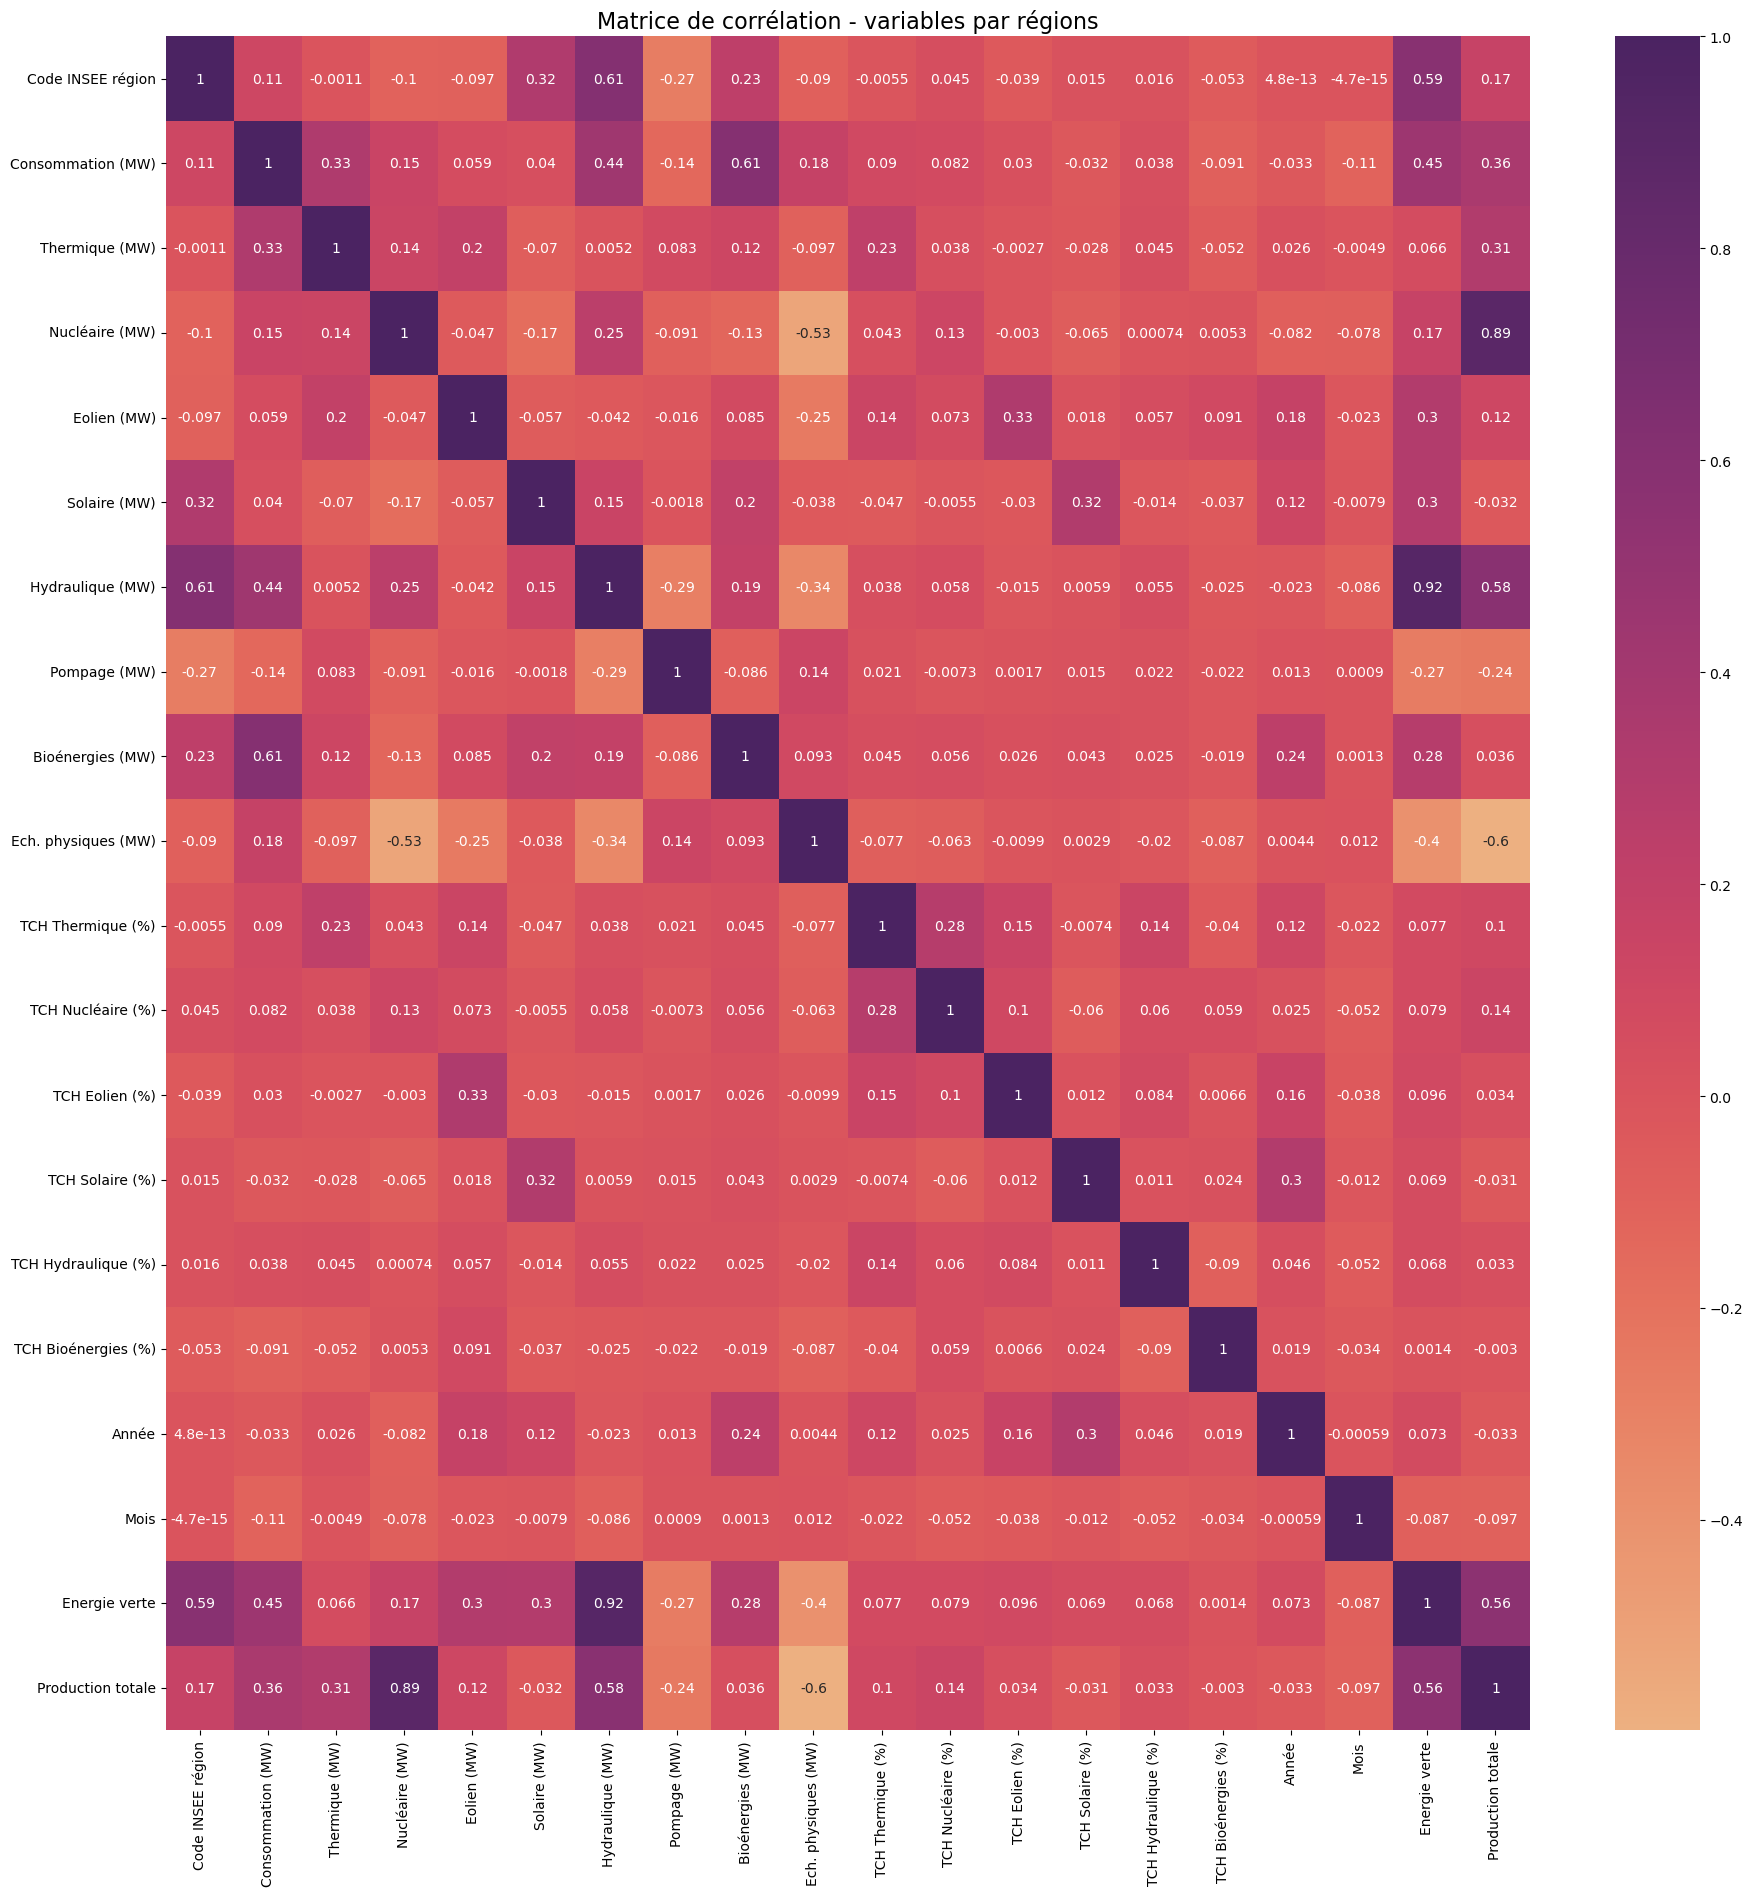

In [15]:
# Matrice de la corrélation des variables niveau régional

corr = df.corr()
fig, ax = plt.subplots(figsize=(22, 22))

sns.heatmap(corr, annot=True, cmap = 'flare')
plt.title('Matrice de corrélation - variables par régions', fontsize = 16);

In [16]:
#Les variables les plus corrélées sont: 
## Hydraulique - Energie verte (0.92)
## Nucléaire - Production totale (0.89)
## Hydraulique - Code INSEE région (0.61)
## Energie verte - Code INSEE région (0.59)
## Hydraulique - Production totale (0.58)
## Energie verte - Production totale (0.56)

#Les variables les plus corrélées avec la variable cible (Consommation) sont:
## Bioénergies (0.61)
## Energie verte (0.45)
## Hydraulique (0.44)
## Production totale (0.36)
## Thermique (0.33)

In [17]:
#Aggregation niveau national

df["TCH Total"] = (df["TCH Thermique (%)"] + df["TCH Nucléaire (%)"] +
    df["TCH Eolien (%)"] + df["TCH Solaire (%)"] + df["TCH Hydraulique (%)"] +
    df["TCH Bioénergies (%)"])


agg_dict = {"Consommation (MW)":"sum",
    "Thermique (MW)": "sum",
    "Nucléaire (MW)": "sum",
    "Eolien (MW)": "sum",
    "Solaire (MW)": "sum",
    "Hydraulique (MW)": "sum",
    "Pompage (MW)": "sum",
    "Bioénergies (MW)": "sum",
    "Energie verte": "sum",
    "Production totale": "sum",
    "Ech. physiques (MW)": "sum",
     "TCH Thermique (%)": "sum",
    "TCH Nucléaire (%)": "sum",          
    "TCH Eolien (%)": "sum",          
    "TCH Solaire (%)": "sum",
    "TCH Hydraulique (%)": "sum",
    "TCH Bioénergies (%)": "sum",
    "TCH Total": "sum"}
    
france_total = df.groupby(["Date","Heure","Année", "Mois"], as_index=False).agg(agg_dict)
france_total["Région"] = "France"
france_total["Code INSEE région"] = "XXX"

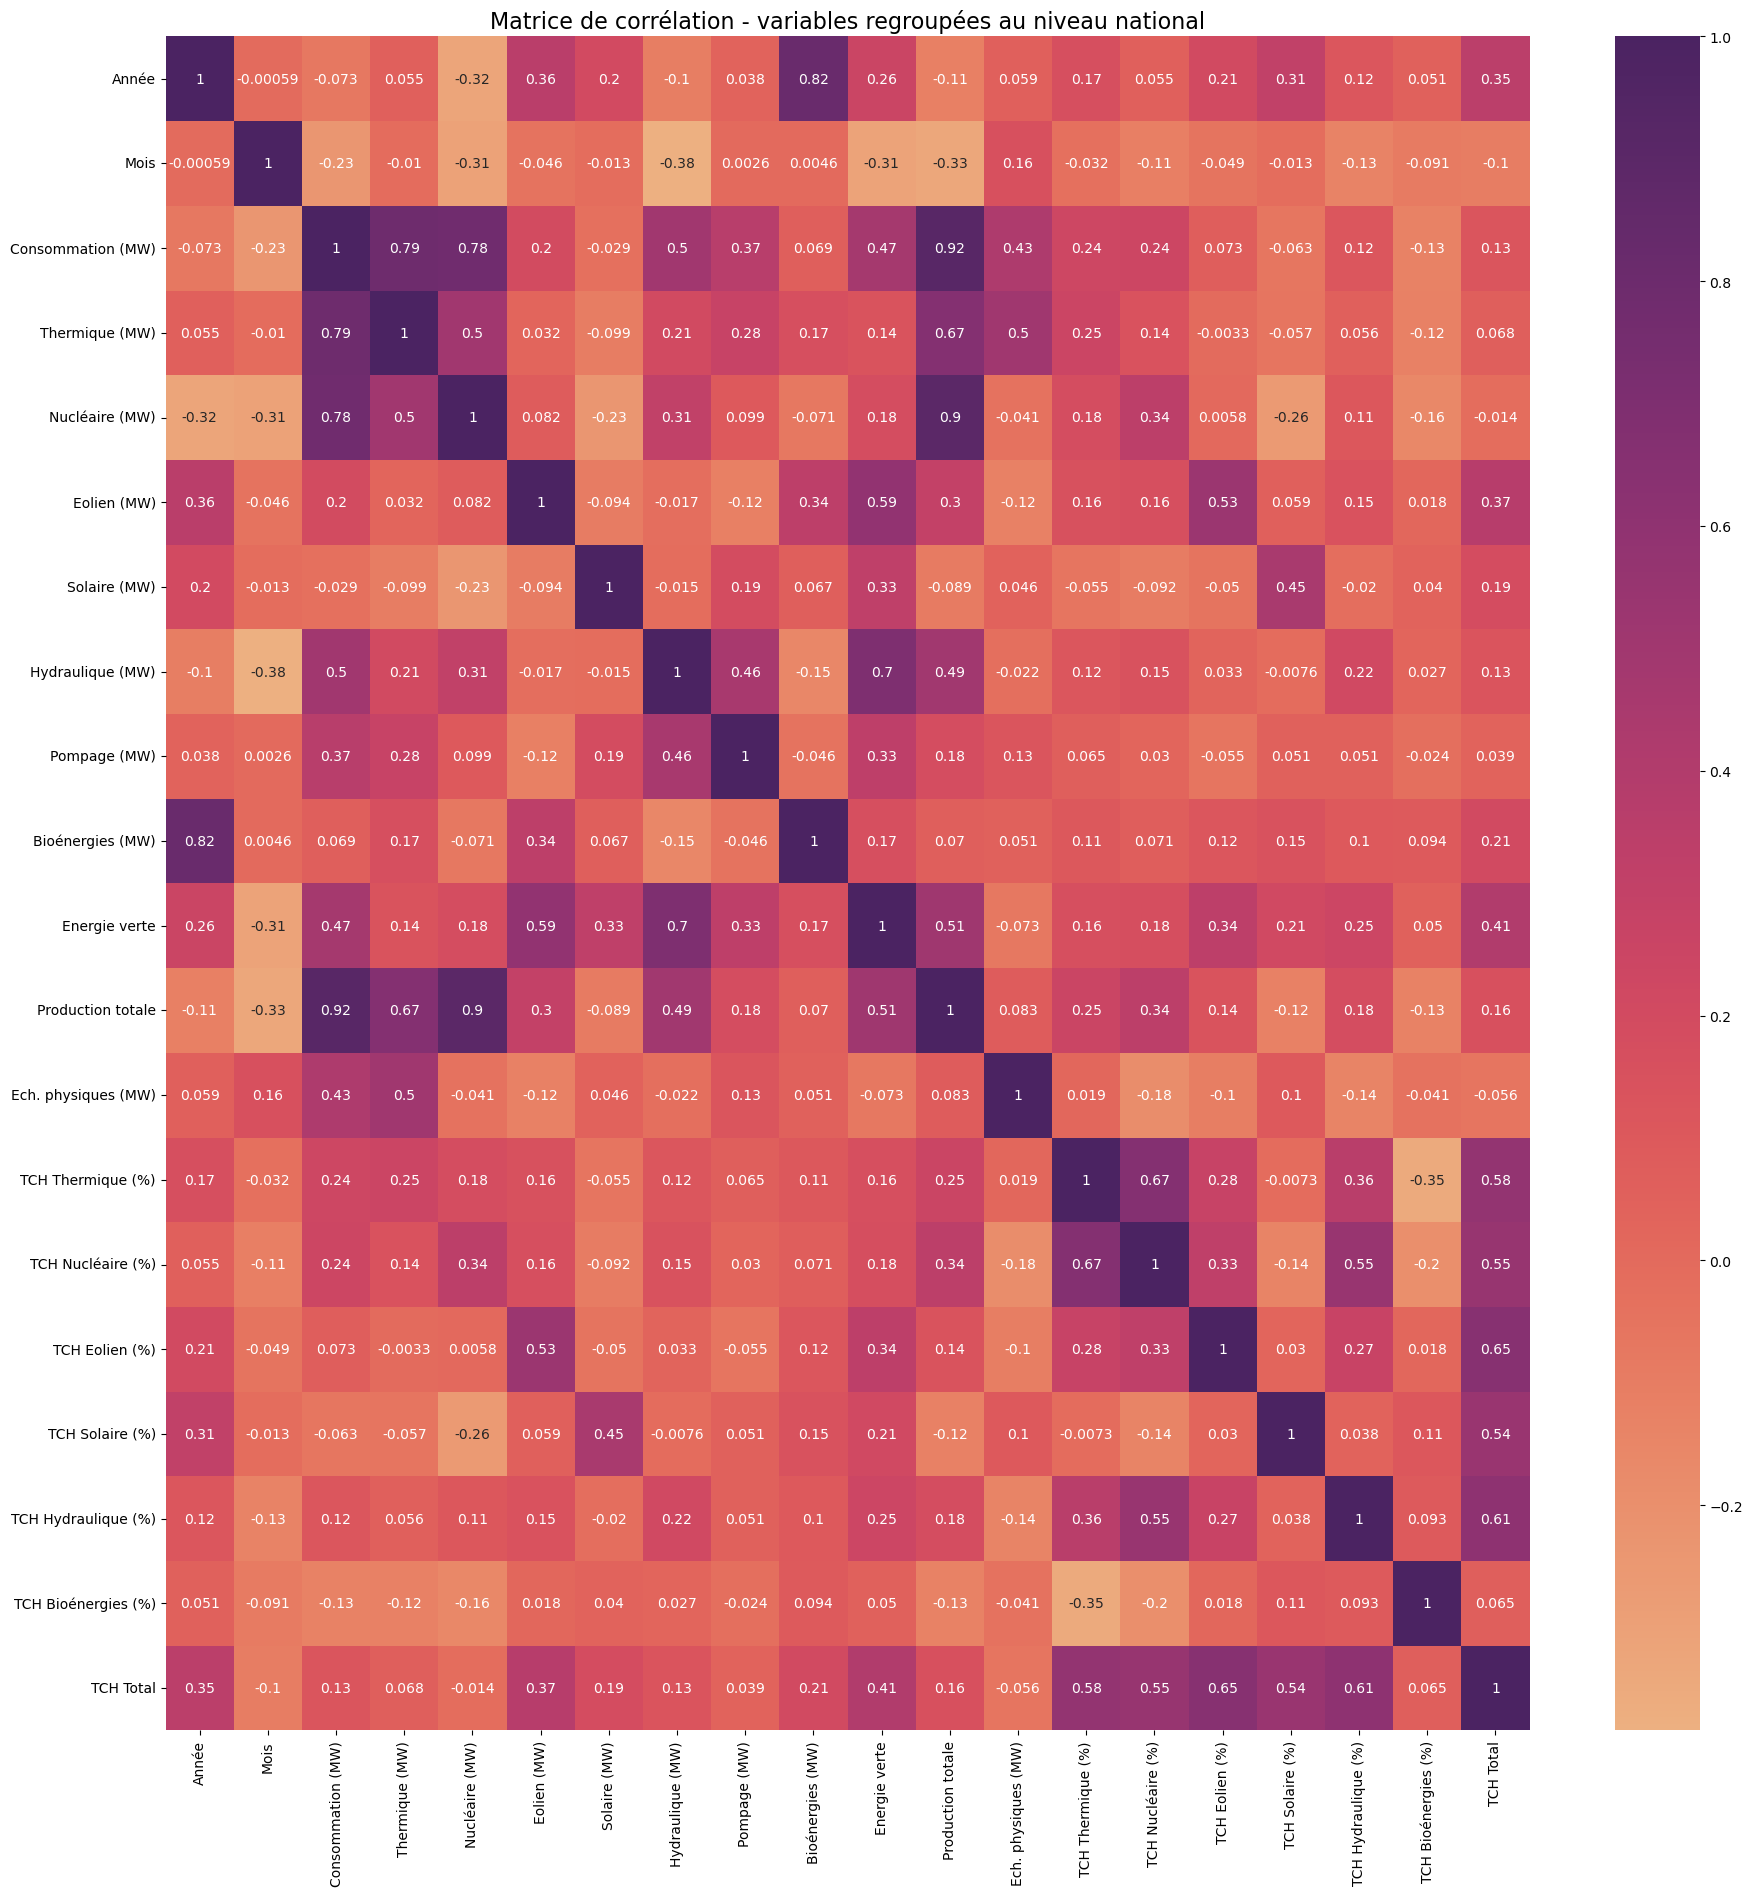

In [18]:
corr = france_total.corr()
fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, annot=True, cmap = 'flare')
plt.title("Matrice de corrélation - variables regroupées au niveau national", fontsize = 16);

,Année,Nucléaire (MW),Thermique (MW),Energie verte
0,2013,677917578.0,43633426.0,101021693.0
1,2014,689998992.5,24962182.5,97748859.5
2,2015,690949004.0,33357442.0,94816571.5
3,2016,658950962.5,44393868.5,101248913.5
4,2017,653380915.5,52753558.0,95543336.5
5,2018,667478114.0,37993132.0,115667461.5
6,2019,653724363.0,41076448.5,115079951.5
7,2020,610476827.0,36771551.5,126647501.5


Moyenne annuelle de la production Nucléaire =  662859594.5625 MW
Moyenne annuelle de la production Thermique =  39367701.125 MW
Moyenne annuelle de la production Energie Verte =  105971786.0625 MW


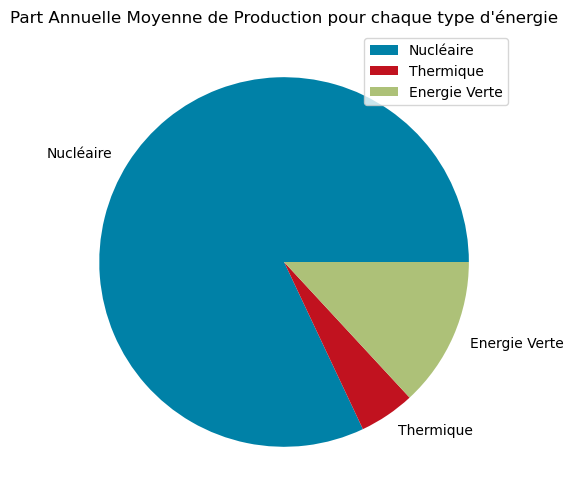

In [19]:
#Part de la production Nucléaire/Thermique/Energie verte en moyenne annuelle
df_partprod = df.groupby('Année', as_index = False).agg({'Nucléaire (MW)':'sum', 
                                                         'Thermique (MW)':'sum', 'Energie verte':'sum' })
display(df_partprod)
#Moyenne Annuelle de la poduction Nucléaire 'MAN'
MAN = df_partprod['Nucléaire (MW)'].mean()
print('Moyenne annuelle de la production Nucléaire = ', MAN, 'MW')
#Moyenne Annuelle de la poduction Thermique 'MAT'
MAT = df_partprod['Thermique (MW)'].mean()
print('Moyenne annuelle de la production Thermique = ', MAT, 'MW')
#Moyenne Annuelle de la poduction Energie Verte 'MAEV'
MAEV = df_partprod['Energie verte'].mean()
print('Moyenne annuelle de la production Energie Verte = ', MAEV, 'MW')

plt.figure(figsize=(6, 6))
x=[MAN, MAT, MAEV]
plt.pie(x, labels = ['Nucléaire', 'Thermique', 
                     'Energie Verte'], colors = ['#0081a7', '#c1121f', '#adc178'])
plt.title("Part Annuelle Moyenne de Production pour chaque type d'énergie")
plt.legend();

KeyboardInterrupt: 

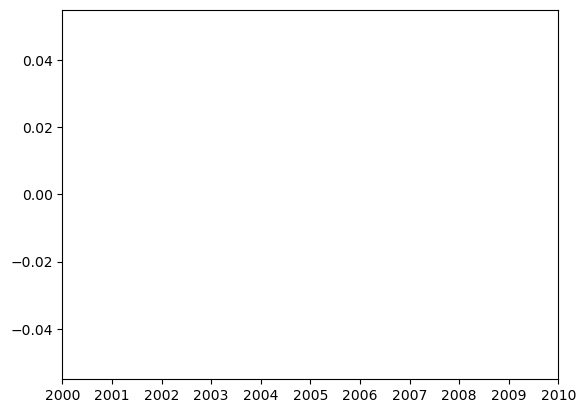

In [20]:
# Courbe d'évolution de la consommation par année

sns.lineplot(x= 'Date', y='Consommation (MW)', data=df, color='skyblue')
plt.xlabel('Année',fontsize=14)
plt.ylabel('Consommation(MW)', fontsize=14)
plt.title("Evolution de la consommation par année",fontsize=16);

# Nous constatons une courbe assez stable et la saisonnalité des piques de la consommation 

KeyboardInterrupt: 

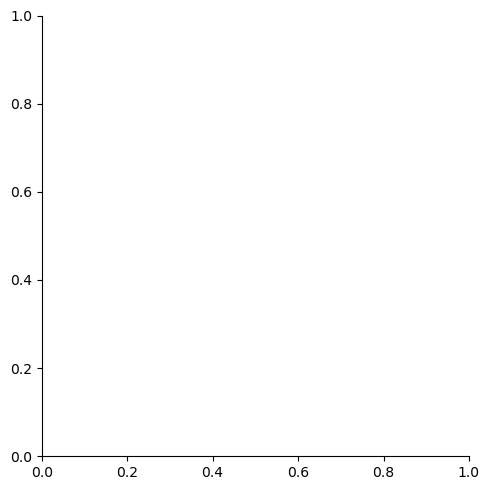

In [21]:
# Consommation d'énergie par mois et à travers les années
sns.catplot(x='Mois', y='Consommation (MW)', data=df, kind='bar', hue='Année', palette='hls');

# Nous constatons une tendance répétitive à travers les années: baisse de la consommation en été 
# et hausse en période de Novembre-Mars.

In [22]:
df_year=df.groupby(['Année'], as_index=False).sum()
df_year.head()

,Année,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),...,TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Mois,Energie verte,Production totale,TCH Total
0,2013,10494480,492091749.5,43633426.0,677917578.0,15838096.0,4504445.5,74564962.0,-7183144.0,6114189.5,...,1769169.60,6492211.20,2016201.60,30484.80,2628000.0,5595537.60,1372032,101021693.0,829755841.0,18531604.80
1,2014,10494480,462348578.0,24962182.5,689998992.5,17058459.0,5819829.5,67360131.5,-7990101.5,7510439.5,...,1769169.60,6492211.20,2016201.60,30484.80,2628000.0,5595537.60,1372032,97748859.5,820700136.0,18531604.80
2,2015,10494480,473152860.0,33357442.0,690949004.0,21094085.5,7286366.5,58519761.0,-6888466.0,7916358.5,...,1769169.60,6492211.20,2016201.60,30484.80,2628000.0,5595537.60,1372032,94816571.5,826011483.5,18531604.80
3,2016,10523232,480315498.0,44393868.5,658950962.5,20917713.0,8260894.5,63358799.5,-6749253.0,8711506.5,...,1774016.64,6509998.08,2021725.44,30568.32,2635200.0,5610867.84,1373184,101248913.5,811342997.5,18582376.32
4,2017,10494480,479044723.0,52753558.0,653380915.5,24097491.0,8993956.5,53013218.0,-7157481.0,9438671.0,...,1769169.60,6492211.20,2016201.60,30484.80,2628000.0,5595537.60,1372032,95543336.5,808835291.0,18531604.80


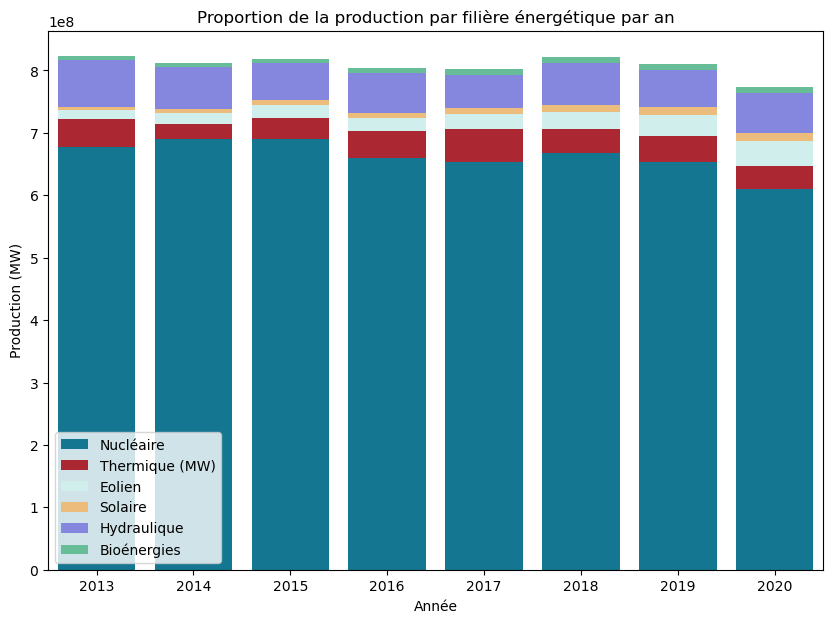

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x='Année', y='Nucléaire (MW)', data=df_year, label='Nucléaire', color='#0081a7')
sns.barplot(x='Année', y='Thermique (MW)', data=df_year,label='Thermique (MW)', bottom=df_year['Nucléaire (MW)'], color='#c1121f')
sns.barplot(x='Année', y='Eolien (MW)', data=df_year,label='Eolien', color='#cbf3f0', bottom=df_year['Nucléaire (MW)']+df_year['Thermique (MW)'])
sns.barplot(x='Année', y='Solaire (MW)', data=df_year,label='Solaire', color='#ffbf69', bottom=df_year['Nucléaire (MW)']+df_year['Thermique (MW)']+df_year['Eolien (MW)'])
sns.barplot(x='Année', y='Hydraulique (MW)', data=df_year,label='Hydraulique', color='#7678ed', bottom=df_year['Nucléaire (MW)']+df_year['Thermique (MW)']+df_year['Eolien (MW)']+df_year['Solaire (MW)'])
sns.barplot(x='Année', y='Bioénergies (MW)', data=df_year,label='Bioénergies', color='#57cc99', bottom=df_year['Nucléaire (MW)']+df_year['Thermique (MW)']+df_year['Eolien (MW)']+df_year['Solaire (MW)']+df_year['Hydraulique (MW)'])
plt.legend()
plt.title('Proportion de la production par filière énergétique par an')
plt.ylabel('Production (MW)');


In [24]:
df_region=df.groupby(['Région'], as_index=False).sum()
df_region.head()

,Région,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),...,TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Année,Mois,Energie verte,Production totale,TCH Total
0,Auvergne-Rhône-Alpes,11781504,528065557.5,15835235.5,665530408.5,7587474.5,7254918.0,225754824.5,-31234892.5,7269362.5,...,4357189.635,1375745.955,141243.235,1784411.690,3787920.645,282826368,914880,247866579.5,960467116.0,1.271377e+07
1,Bourgogne-Franche-Comté,3786912,170795198.5,5862044.5,439492176.0,8255389.0,2057514.0,6605270.0,-197882.0,1741240.5,...,4331105.280,1411485.245,145521.740,1676118.340,3735999.425,282826368,914880,18659413.5,464211516.0,1.252760e+07
2,Bretagne,7433568,177976332.0,5043825.0,439492176.0,13467978.0,1656936.5,4615954.5,-458062.0,2672659.5,...,4331105.280,1390413.225,125624.260,1758479.765,3814327.270,282826368,914880,22413528.5,467407591.5,1.254884e+07
3,Centre-Val de Loire,3366144,150686425.0,2749612.0,587672987.5,16504552.5,2179348.0,948956.0,0.0,3574920.5,...,4353755.410,1421763.050,142016.005,1670933.535,3840786.400,282826368,914880,23207777.0,613630376.5,1.265030e+07
4,Grand Est,6171264,364890837.0,73378472.5,628792789.0,46113322.0,4966187.5,66787463.5,-8010955.0,6209285.0,...,4341939.975,1416970.040,135724.215,1839304.770,3698195.140,282826368,914880,124076258.0,834258474.5,1.267737e+07


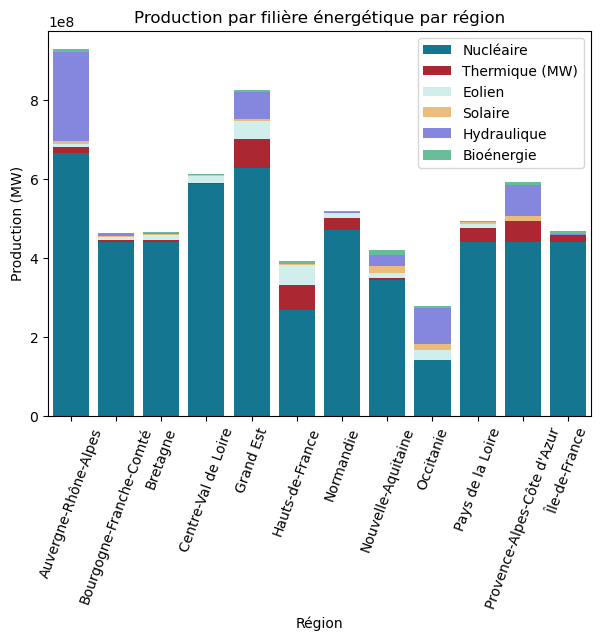

In [25]:
plt.figure(figsize=(7,5))

sns.barplot(x='Région', y='Nucléaire (MW)', data=df_region, label='Nucléaire', color='#0081a7')
sns.barplot(x='Région', y='Thermique (MW)', data=df_region,label='Thermique (MW)', bottom=df_region['Nucléaire (MW)'], color='#c1121f')
sns.barplot(x='Région', y='Eolien (MW)', data=df_region,label='Eolien', color='#cbf3f0', bottom=df_region['Nucléaire (MW)']+df_region['Thermique (MW)'])
sns.barplot(x='Région', y='Solaire (MW)', data=df_region,label='Solaire', color='#ffbf69', bottom=df_region['Nucléaire (MW)']+df_region['Thermique (MW)']+df_region['Eolien (MW)'])
sns.barplot(x='Région', y='Hydraulique (MW)', data=df_region,label='Hydraulique', color='#7678ed', bottom=df_region['Nucléaire (MW)']+df_region['Thermique (MW)']+df_region['Eolien (MW)']+df_region['Solaire (MW)'])
sns.barplot(x='Région', y='Bioénergies (MW)', data=df_region,label='Bioénergie', color='#57cc99', bottom=df_region['Nucléaire (MW)']+df_region['Thermique (MW)']+df_region['Eolien (MW)']+df_region['Solaire (MW)']+df_region['Hydraulique (MW)'])

plt.title('Production par filière énergétique par région')
plt.legend()
plt.ylabel('Production (MW)')
plt.xticks(rotation=70);


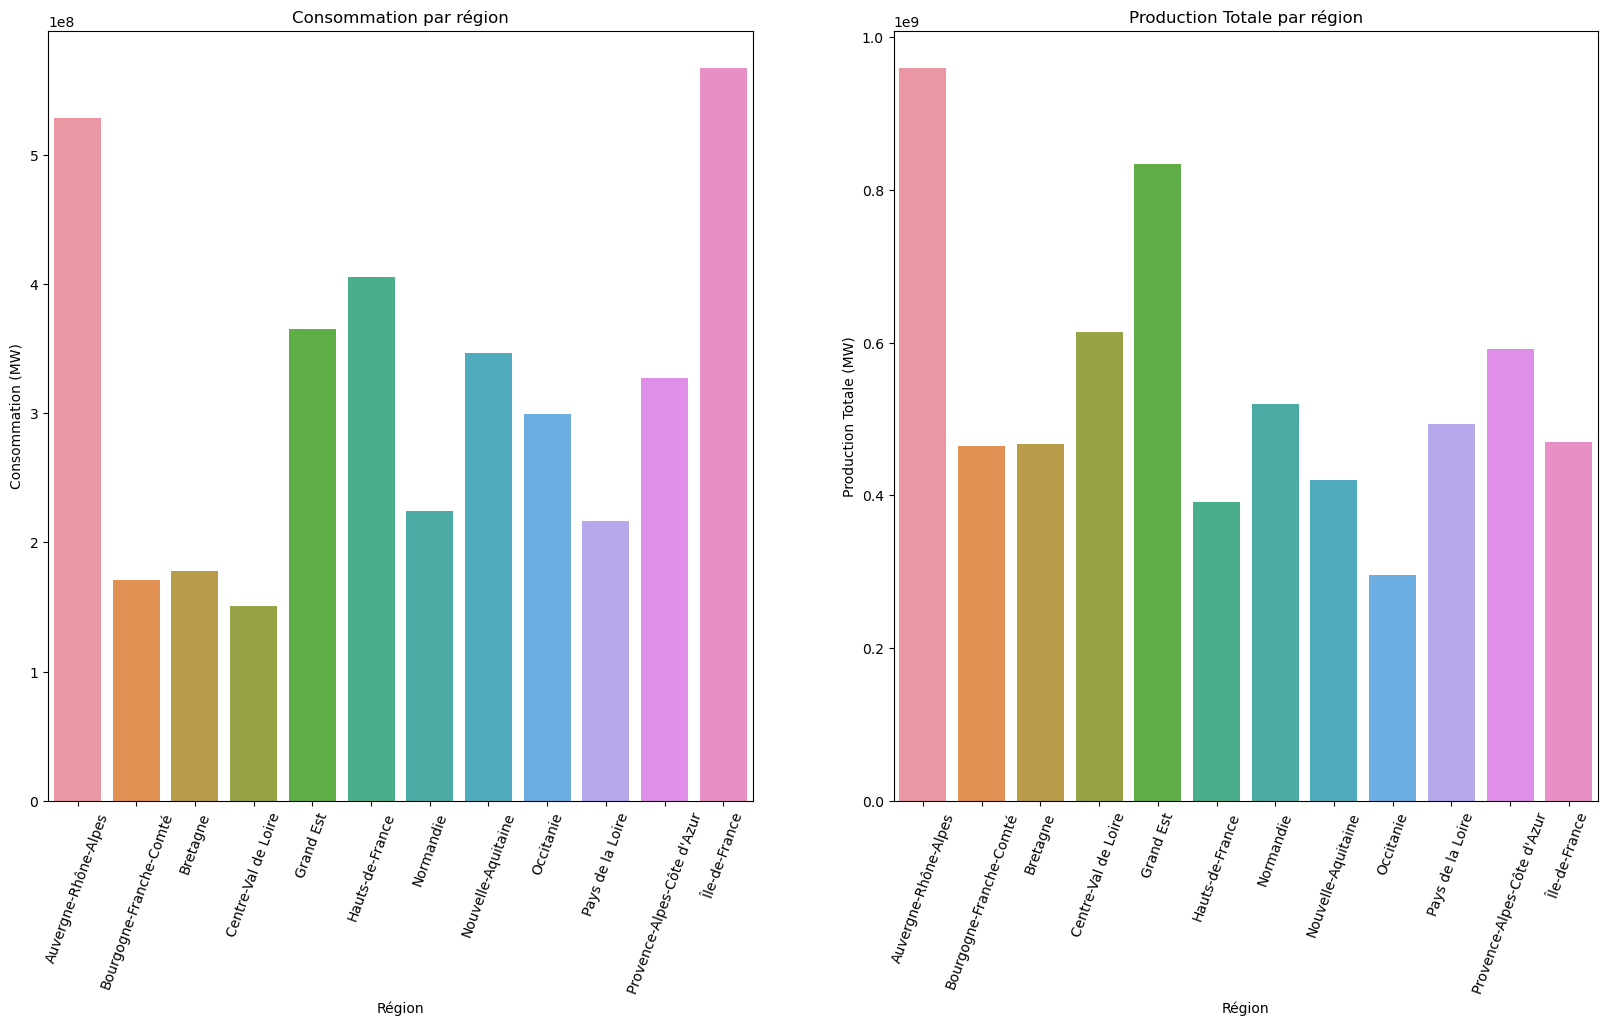

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='Région', y='Consommation (MW)', data=df_region)
plt.xticks(rotation=70)
plt.ylabel('Consommation (MW)')

plt.title('Consommation par région');

plt.subplot(122)
sns.barplot(x='Région', y='Production totale', data=df_region)
plt.xticks(rotation=70)
plt.ylabel('Production Totale (MW)')

plt.title('Production Totale par région');


In [27]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
france_data = df.copy()

agg_dict = {"Consommation (MW)":"sum",
    "Thermique (MW)": "sum",
    "Nucléaire (MW)": "sum",
    "Eolien (MW)": "sum",
    "Solaire (MW)": "sum",
    "Hydraulique (MW)": "sum",
    "Pompage (MW)": "sum",
    "Bioénergies (MW)": "sum",
    "Energie verte": "sum",
    "Production totale": "sum",
    "Ech. physiques (MW)": "sum"
}
    
france_total = france_data.groupby(["Date","Heure","Année", "Mois"], as_index=False).agg(agg_dict)
france_total["Région"] = "France"
france_total["Code INSEE région"] = "XXX"


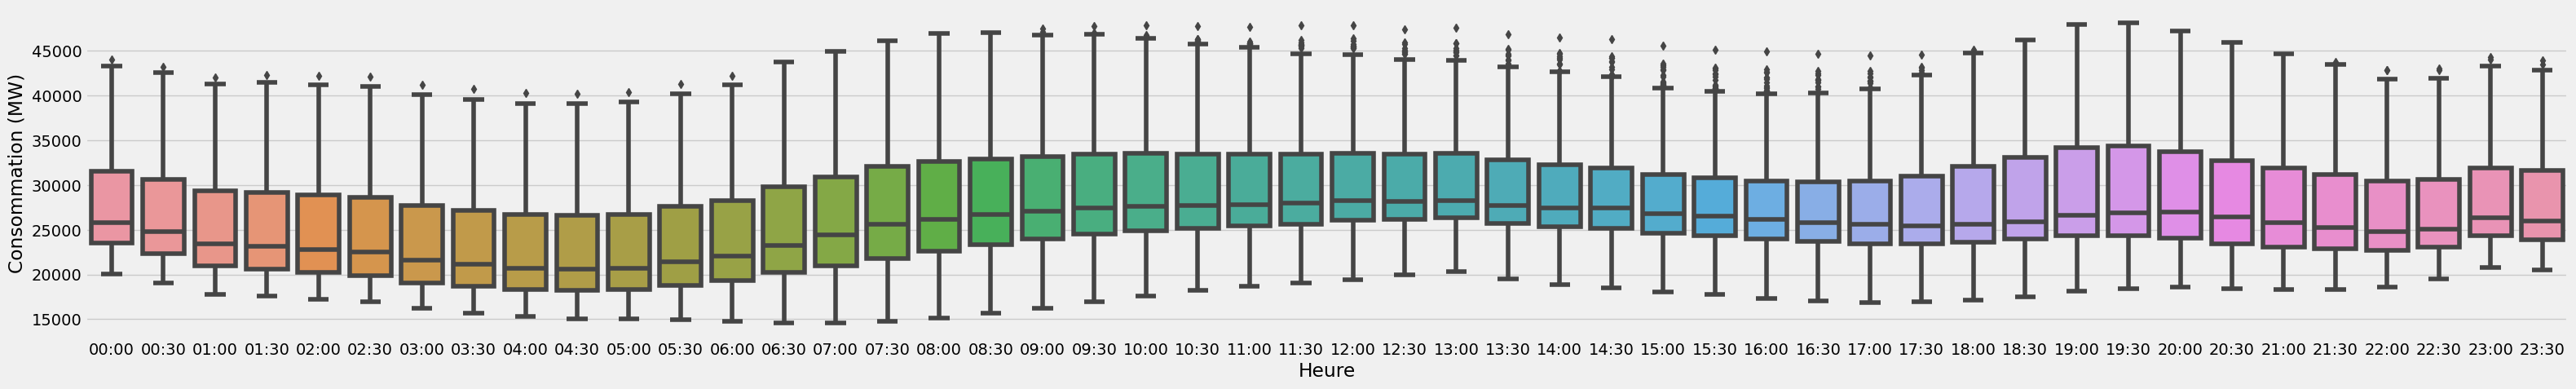

In [28]:
# Boxplot de l'évolution de la consommation horaire dans la journée
plt.figure(figsize = (35,5))
sns.boxplot(data=france_total, x='Heure', y='Consommation (MW)')
plt.show()

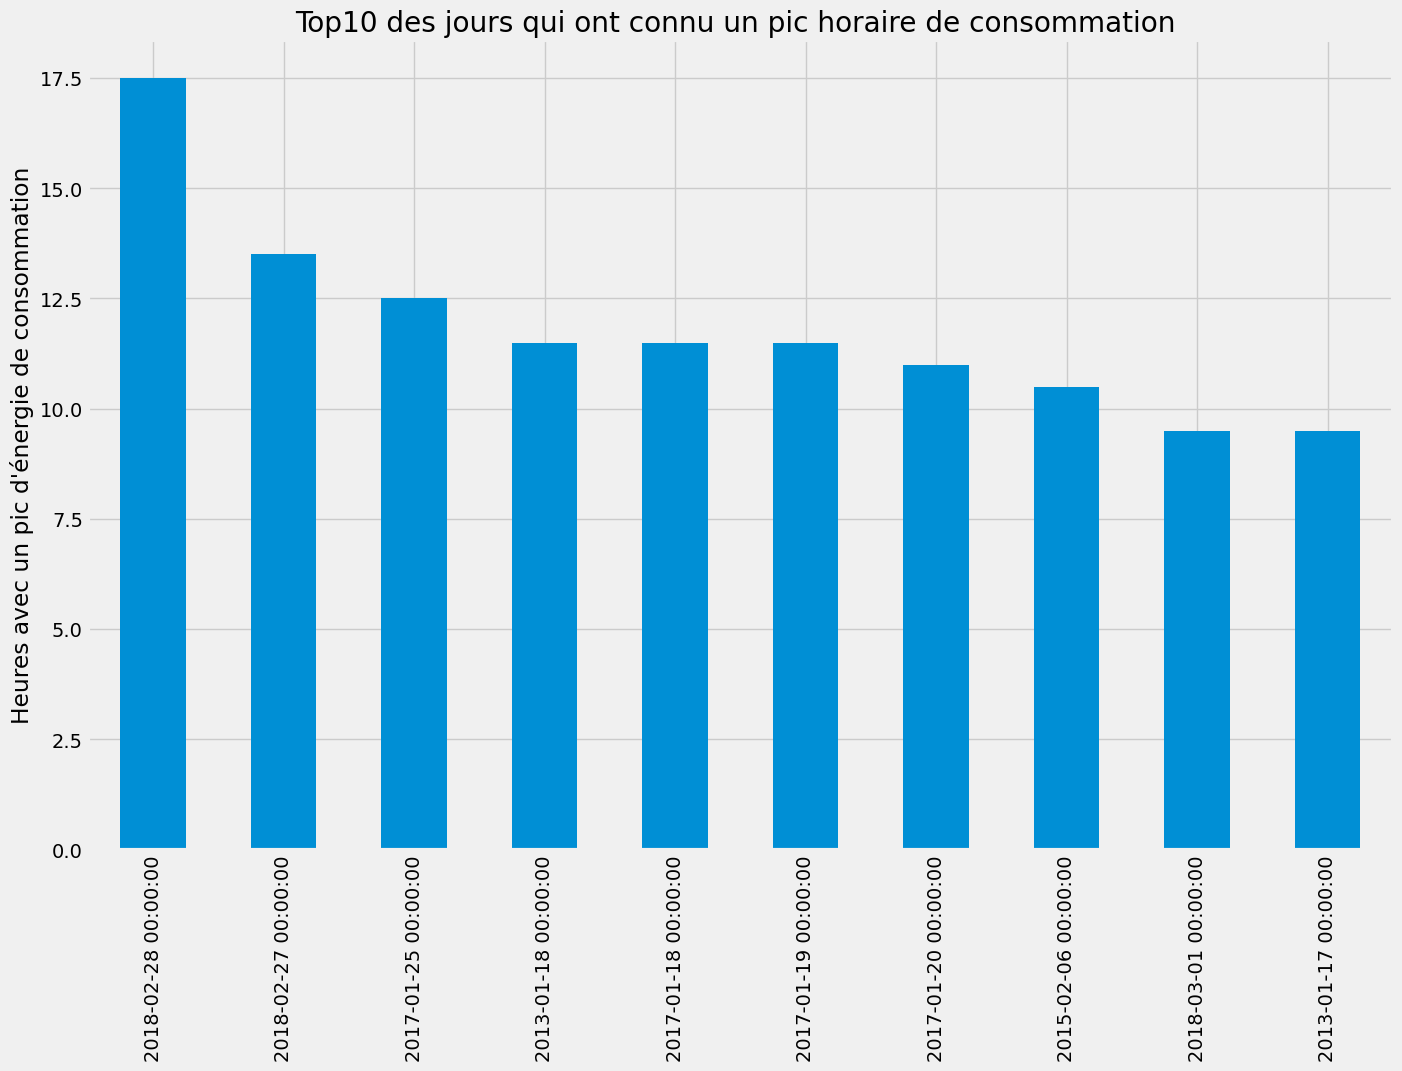

In [29]:
# Les jours où à une heure précise, il y a eu un pic de consommation
top10energydays = france_total.sort_values(by = ['Consommation (MW)'], ascending=False)[["Date","Heure",'Consommation (MW)']].head(500)["Date"].value_counts()[0:10] / 2
plt.figure (figsize = (15,10))
top10energydays.plot(kind="bar", title="Top10 des jours qui ont connu un pic horaire de consommation ")
plt.ylabel("Heures avec un pic d'énergie de consommation");


In [30]:
# Nouveau dataset avec aggrégation par jour, pour réduire mes données
france_total_daily = france_total.groupby(["Date","Année", "Mois"], as_index=False).agg(agg_dict)

# Changement date-datatype and index
france_total_daily["Date"] = pd.to_datetime(france_total_daily["Date"])
france_total_daily = france_total_daily.set_index("Date")
#display(france_total_daily.head())

# dimmensions du nouveau dataset
print(f"Number of DailyObservations: {france_total_daily.shape}")
print(f"Number of Observations: {france_total.shape}")


Number of DailyObservations: (2922, 13)
Number of Observations: (140256, 17)


In [31]:
france_total_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2013-01-01 to 2020-12-31
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Année                2922 non-null   int64  
 1   Mois                 2922 non-null   int64  
 2   Consommation (MW)    2922 non-null   float64
 3   Thermique (MW)       2922 non-null   float64
 4   Nucléaire (MW)       2922 non-null   float64
 5   Eolien (MW)          2922 non-null   float64
 6   Solaire (MW)         2922 non-null   float64
 7   Hydraulique (MW)     2922 non-null   float64
 8   Pompage (MW)         2922 non-null   float64
 9   Bioénergies (MW)     2922 non-null   float64
 10  Energie verte        2922 non-null   float64
 11  Production totale    2922 non-null   float64
 12  Ech. physiques (MW)  2922 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 319.6 KB


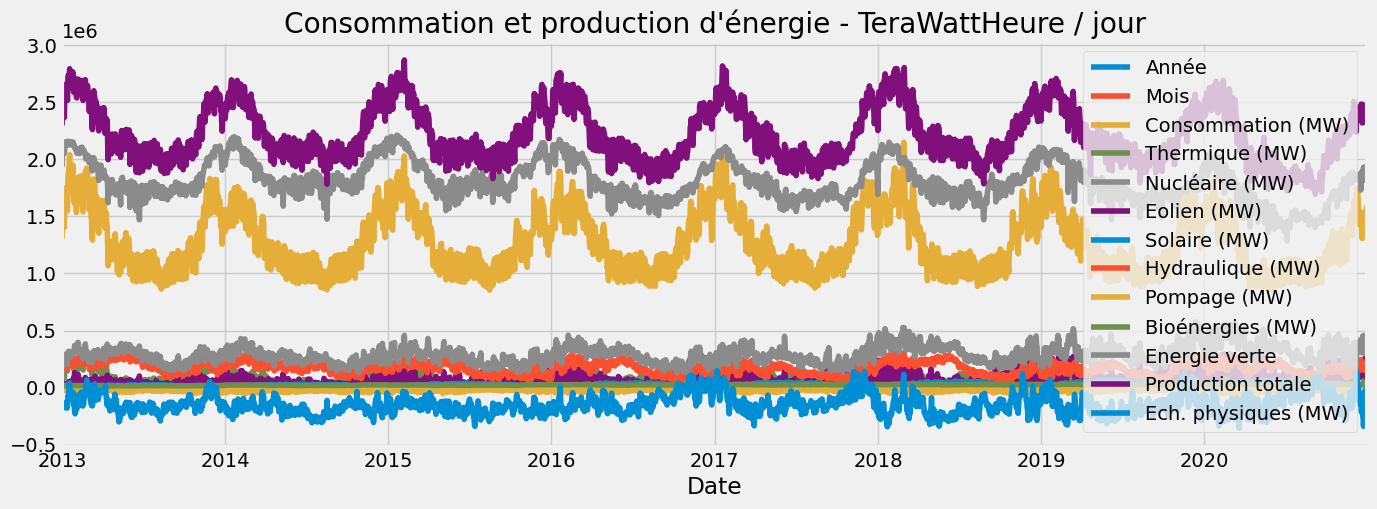

In [32]:
# Visualisation du graphe d'évolution consommation et production à travers le temps

france_total_daily.plot( 
        figsize=(15, 5),
        title="Consommation et production d'énergie - TeraWattHeure / jour")
plt.legend();



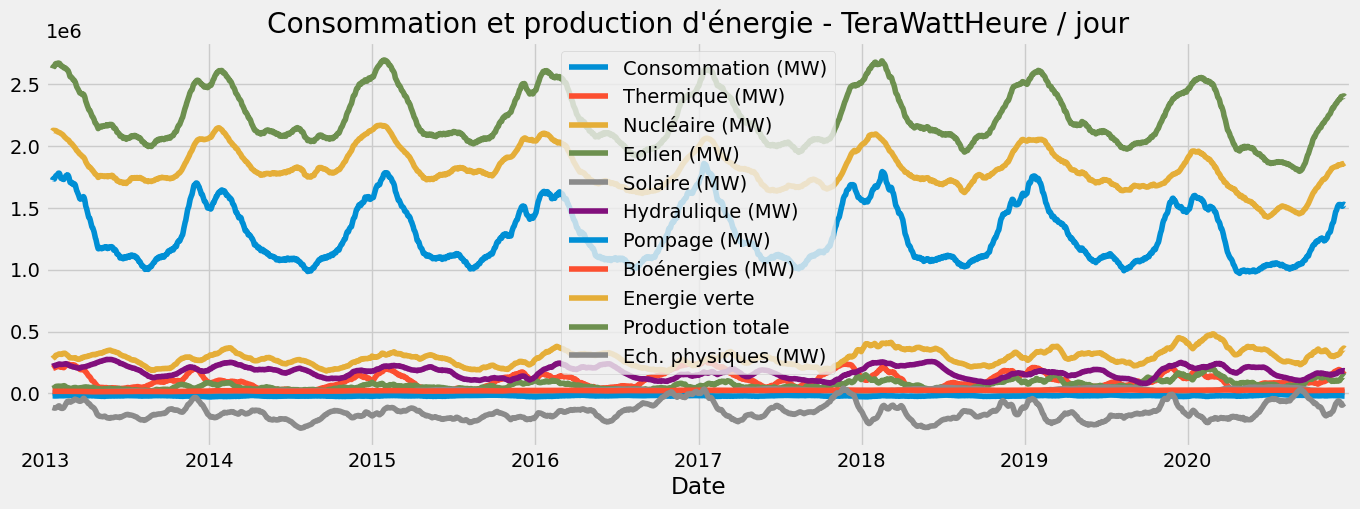

In [33]:
# Graphe lissé 
# Check with public statistics: https://de.statista.com/statistik/daten/studie/151356/umfrage/stromverbrauch-ausgewaehlter-laender-weltweit/

france_total_daily_smoothed = france_total_daily.copy() 
france_total_daily_smoothed.iloc[:,2:13] = france_total_daily_smoothed.iloc[:,2:13].rolling(window = 30, center = True, axis=0).mean() #I forgot the mean, rolling is just for selecting

france_total_daily_smoothed.iloc[:,2:13].plot( 
        figsize=(15, 5),
        title="Consommation et production d'énergie - TeraWattHeure / jour")
plt.legend();

In [34]:
# Création de fonctionnalités and Boxplots
#france_total_daily.info()

france_total_daily.insert(2, 'dayofweek',france_total_daily.index.dayofweek)
france_total_daily.insert(3, 'quarter', france_total_daily.index.quarter)
france_total_daily.insert(4, 'dayofyear', france_total_daily.index.dayofyear)
france_total_daily.insert(5, 'dayofmonth', france_total_daily.index.day)
france_total_daily.insert(6,'weekofyear', france_total_daily.index.isocalendar().week)

#check
display(france_total_daily.head(50))
display(france_total_daily.info())

,Année,Mois,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Energie verte,Production totale,Ech. physiques (MW)
Date,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,1,1,1,1,1302915.5,87092.0,1935612.0,61331.0,2816.0,160274.0,-32933.5,17306.5,241727.5,2297365.0,-174828.0
2013-01-02,2013,1,2,1,2,2,1,1547797.0,112587.0,2090658.5,33975.0,6306.5,210772.0,-17533.0,16826.5,267880.0,2488658.5,-154583.5
2013-01-03,2013,1,3,1,3,3,1,1599382.0,142663.0,2078484.0,38613.5,5057.5,219455.5,-17229.5,17433.0,280559.5,2518936.0,-133927.5
2013-01-04,2013,1,4,1,4,4,1,1565699.5,127504.5,2094681.0,24414.5,3401.5,207150.0,-24235.0,17990.0,252956.0,2499376.5,-133999.5
2013-01-05,2013,1,5,1,5,5,1,1443411.0,87657.0,2075291.0,21996.0,3599.5,192602.0,-27680.0,18435.5,236633.0,2427261.0,-177290.5
2013-01-06,2013,1,6,1,6,6,1,1404775.5,86433.0,2052228.5,15380.5,3728.5,162525.5,-28411.0,18319.0,199953.5,2367026.0,-154211.5
2013-01-07,2013,1,0,1,7,7,2,1628559.0,194730.0,2103793.5,11171.0,3980.5,221078.5,-15889.0,17581.5,253811.5,2568224.0,-156710.0
2013-01-08,2013,1,1,1,8,8,2,1715718.0,233033.5,2124548.0,9972.5,3523.5,243657.5,-15384.5,17732.5,274886.0,2647852.0,-150127.0
2013-01-09,2013,1,2,1,9,9,2,1750458.5,198225.0,2154442.5,10942.0,3350.0,259378.5,-14005.5,17922.0,291592.5,2658265.5,-128603.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2013-01-01 to 2020-12-31
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Année                2922 non-null   int64  
 1   Mois                 2922 non-null   int64  
 2   dayofweek            2922 non-null   int64  
 3   quarter              2922 non-null   int64  
 4   dayofyear            2922 non-null   int64  
 5   dayofmonth           2922 non-null   int64  
 6   weekofyear           2922 non-null   UInt32 
 7   Consommation (MW)    2922 non-null   float64
 8   Thermique (MW)       2922 non-null   float64
 9   Nucléaire (MW)       2922 non-null   float64
 10  Eolien (MW)          2922 non-null   float64
 11  Solaire (MW)         2922 non-null   float64
 12  Hydraulique (MW)     2922 non-null   float64
 13  Pompage (MW)         2922 non-null   float64
 14  Bioénergies (MW)     2922 non-null   float64
 15  Energie verte       

None

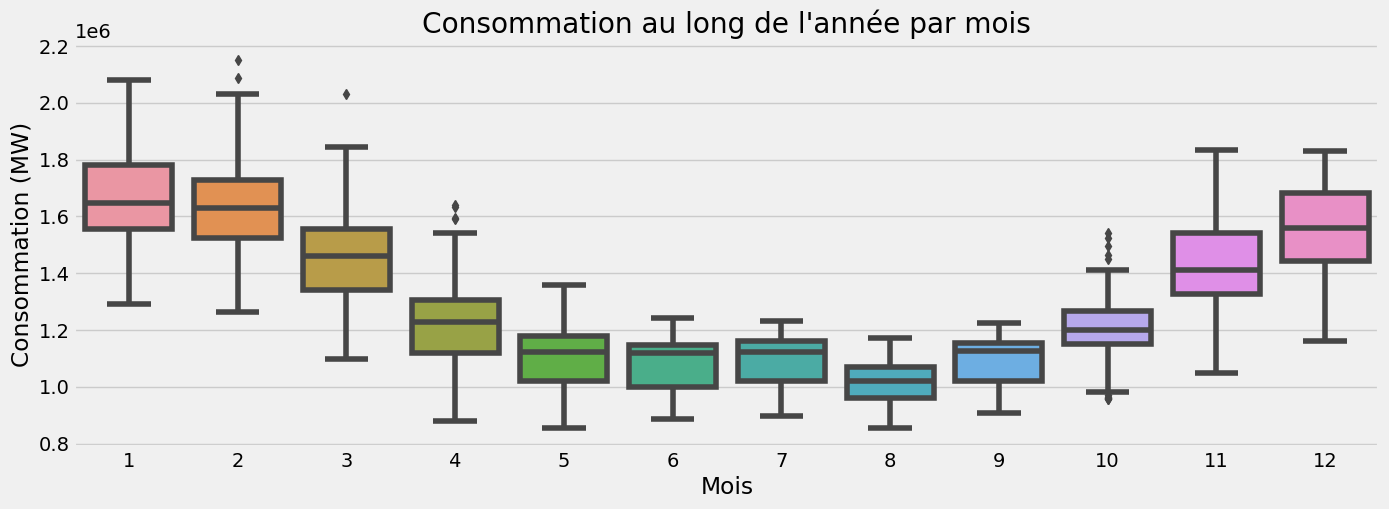

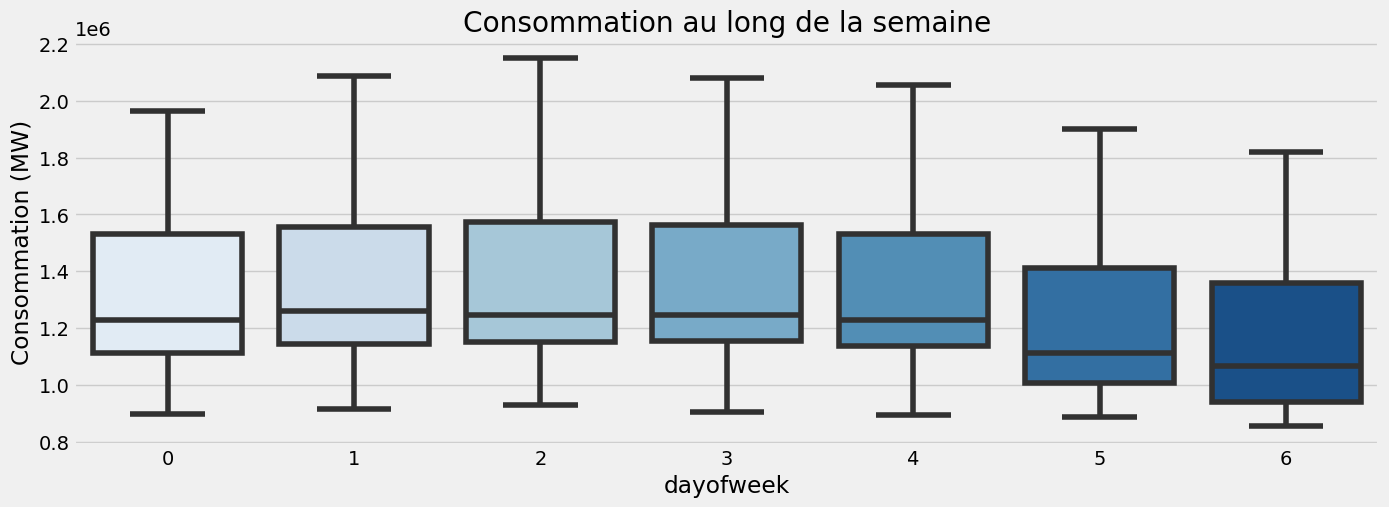

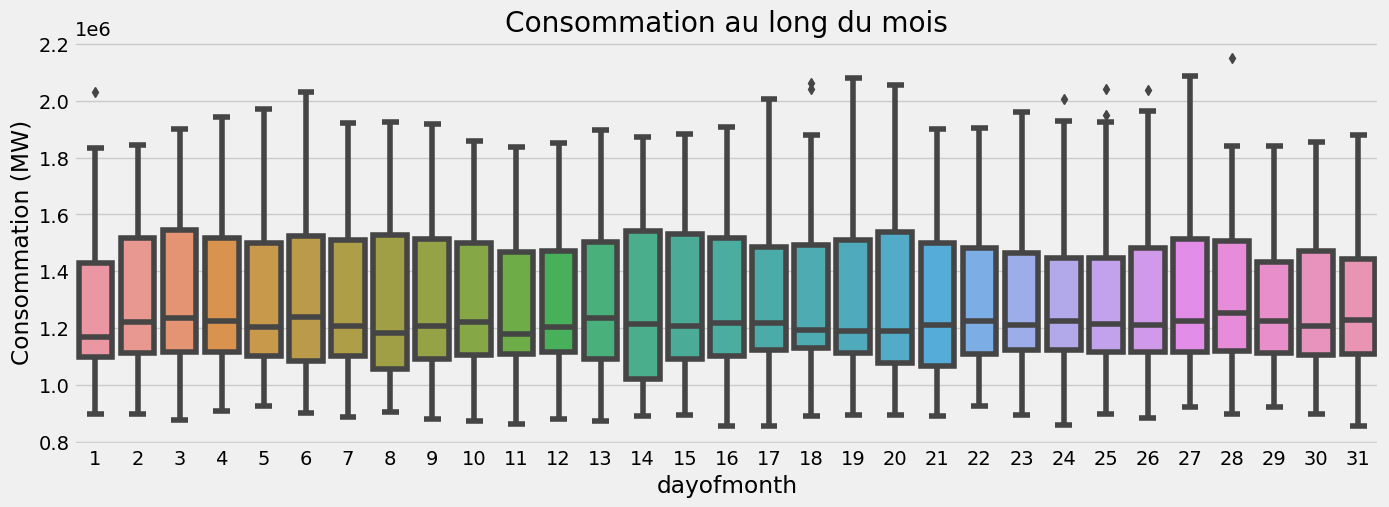

In [35]:
# Boxplots
plt.figure(figsize = (15,5))
plt.title("Consommation au long de l'année par mois")
sns.boxplot(data=france_total_daily, x='Mois', y='Consommation (MW)')
plt.figure(figsize = (15,5))
plt.title("Consommation au long de la semaine")
sns.boxplot(data=france_total_daily, x='dayofweek', y='Consommation (MW)', palette='Blues')
plt.figure(figsize = (15,5))
plt.title("Consommation au long du mois")
sns.boxplot(data=france_total_daily, x='dayofmonth', y='Consommation (MW)');


On remarque : 
- une baisse de consommation l'été
- une baisse de consommation le week-end
- le jour du mois ne semble pas signifiant

# III) STATISTIQUES : CORRELATIONS, NIVEAUX de DEPENDANCES

### DEPENDANCES ENTRE VARIABLES QUANTITATIVES

In [ ]:
# Production Totale / Consommation
plt.figure( figsize= (10, 10))
sns.relplot(x= "Production totale",y= "Consommation (MW)", data = france_total_daily)
plt.title("Relation Production Consommation");

In [ ]:
prop_coef = france_total['Consommation (MW)'].corr(france_total['Production totale'])
print("Le coefficient de proportionnalité:", prop_coef)

In [ ]:
# Consommation / Production totale : test de corrélation de Pearson
display(pd.DataFrame(pearsonr(df['Consommation (MW)'], df['Production totale']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test']))

In [ ]:
# Production Totale / Energie nucléaire : test de corrélation de Pearson
display(pd.DataFrame(pearsonr(df['Production totale'], df['Nucléaire (MW)']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test']))
print('p-value <5%, ces variables semblent corrélées, et fortement dépendantes')

In [ ]:
# représentation Production Totale / Energie nucléaire pour une production supérieure à la moyenne, par exemple

df[df['Production totale']>7.749704e+03].plot(kind='scatter', 
                                              x='Production totale', y='Nucléaire (MW)', alpha=0.1, color = '#0081a7',
                                              title = "Relation entre la production totale et la production nucléaire");


In [ ]:
# Production Totale / Energie hydraulique : test de corrélation de Pearson
display(pd.DataFrame(pearsonr(df['Production totale'], df['Hydraulique (MW)']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test']))
print('p-value <5%, ces variables semblent corrélées, et assez dépendantes')

In [ ]:
# représentation Production Totale / Energie hydraulique pour une production supérieure à la moyenne, par exemple

df[df['Production totale']>7.749704e+03].plot(kind='scatter', 
                                              x='Production totale', y='Hydraulique (MW)', alpha=0.1, color = '#7678ed',
                                              title = "Relation entre la production totale et la production hydraulique");

In [ ]:
# prod Energie verte totale / prod Energie hydraulique : test de corrélation de Pearson
display(pd.DataFrame(pearsonr(df['Energie verte'], df['Hydraulique (MW)']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test']))
print("p-value <5%, la production totale d'énergie verte et celle d'hydraulique semblent corrélées, et très dépendantes")

In [ ]:
# représentation Energie Verte / Energie hydraulique pour une production EV supérieure à la moyenne, par exemple

df[df['Energie verte']>1.007413e+03].plot(kind='scatter', 
                                              x='Energie verte', y='Hydraulique (MW)', alpha=0.1, color = '#adc178',
                                              title = "Relation entre la production totale d'énergie verte et la production hydraulique");


In [ ]:
# Consommation / Energie verte : test de corrélation de Pearson
display(pd.DataFrame(pearsonr(df['Consommation (MW)'], df['Energie verte']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test']))
print('p-value <5%, ces variables semblent corrélées, sans être fortement dépendantes')

In [ ]:
# représentation Consommation / Energie verte pour une consommation supérieure à la moyenne, par exemple

df[df['Consommation (MW)']>4.491233e+03].plot(kind='scatter', 
                                              x='Consommation (MW)', y='Energie verte', alpha=0.1, color = '#adc178',
                                              title = "Relation entre la production d'énergie verte et la consommation");

### DEPENDANCE ENTRE CONSOMMATION et VARIABLES QUALITATIVES

In [ ]:
#Suppression de l'espace dans le nom des variables, qui empêche le test Anova
df['ConsommationMW'] = df['Consommation (MW)']
df['ProductionTotale'] = df['Production totale']
df['NucleaireMW'] = df['Nucléaire (MW)']
df['HydrauliqueMW'] = df['Hydraulique (MW)']
df['EnergieVerte'] = df['Energie verte']


In [ ]:
# Consommation / Mois : test ANOVA
 
result = statsmodels.formula.api.ols('ConsommationMW ~ Mois', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la consommation est corrélée au mois.")

In [ ]:
# Consommation / Année : test ANOVA

result2 = statsmodels.formula.api.ols('ConsommationMW ~ Année', data = df).fit()
table2 = statsmodels.api.stats.anova_lm(result2)
display(table2)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la consommation est corrélée à l'année.")

In [ ]:
# Consommation / Région : test ANOVA

result3 = statsmodels.formula.api.ols('ConsommationMW ~ Région', data = df).fit()
table3 = statsmodels.api.stats.anova_lm(result3)
display(table3)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la consommation est corrélée à la région.")

In [ ]:
# Energie verte / Région : test ANOVA

result4 = statsmodels.formula.api.ols('EnergieVerte ~ Région', data = df).fit()
table4 = statsmodels.api.stats.anova_lm(result4)
display(table4)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la production d'énergie verte est corrélée à la région.")


In [ ]:
# Hydraulique / Région : test ANOVA

result5 = statsmodels.formula.api.ols('HydrauliqueMW ~ Région', data = df).fit()
table5 = statsmodels.api.stats.anova_lm(result5)
display(table5)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la production hydraulique est corrélée à la région.")


In [ ]:
#Consommation / Heure
result6 = statsmodels.formula.api.ols('ConsommationMW ~ Heure', data = df).fit()
table6 = statsmodels.api.stats.anova_lm(result6)
display(table6)
print(" La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la consommation est corrélée à l'heure'.")

In [ ]:
#Consommation / Heure dans le mois
#Exemple du mois de janvier, où la consommation est forte
df_janv = df[df['Mois'] == 1]
result7 = statsmodels.formula.api.ols('ConsommationMW ~ Heure', data = df_janv).fit()
table7 = statsmodels.api.stats.anova_lm(result7)
display(table7)
print("La p-value (PR(>F)) est inférieure à 5 et laisse donc penser que la consommation est corrélée à l'heure dans le mois' .")


# IV) MODELISATION

## 1. Préparation

In [ ]:
#Capacité par filière et consommation par année

france_total_year = df.groupby("Année").agg(agg_dict)


plt.plot(france_total_year["Consommation (MW)"], label="Consumption", c='orange');

plt.bar(france_total_year.index, france_total_year["Thermique (MW)"],
        label="Thermique", color='#c1121f');
plt.bar(france_total_year.index, france_total_year["Nucléaire (MW)"],color='#0081a7',
        label="Nuclear", bottom = france_total_year["Thermique (MW)"]);
plt.bar(france_total_year.index, france_total_year["Eolien (MW)"],color='#cbf3f0',
        label="Eolien", bottom = france_total_year["Nucléaire (MW)"] + france_total_year["Thermique (MW)"]);
plt.bar(france_total_year.index, france_total_year["Solaire (MW)"],color='#ffbf69',
        label="Solaire", bottom = france_total_year["Nucléaire (MW)"] + france_total_year["Thermique (MW)"] +
       france_total_year["Eolien (MW)"]);
plt.bar(france_total_year.index, france_total_year["Hydraulique (MW)"], color='#7678ed',
        label="Hydraulique", bottom = france_total_year["Nucléaire (MW)"] + france_total_year["Thermique (MW)"] +
        france_total_year["Eolien (MW)"] + france_total_year["Solaire (MW)"]);
plt.bar(france_total_year.index, france_total_year["Bioénergies (MW)"],color='#57cc99',
        label="Bioénergies", bottom = france_total_year["Nucléaire (MW)"] + france_total_year["Thermique (MW)"] +
        france_total_year["Eolien (MW)"] + france_total_year["Solaire (MW)"] + france_total_year["Hydraulique (MW)"]);
plt.title("Capacité par filière et consommation")
plothandle = plt.legend() 



In [ ]:
#suppression des colonnes créées pour Anova
df.drop(columns=['ConsommationMW','ProductionTotale','NucleaireMW', 'HydrauliqueMW',
                 'EnergieVerte'], inplace = True)
df.head()


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

In [ ]:
df =df.drop('Production totale', axis = 1)
df = df.drop('Energie verte', axis = 1)
df.head()

In [ ]:
grouped = df.groupby('Région')

df_by_region = {}
for region, data in grouped:
    df_by_region[region] = data
#df_by_region['Normandie']

In [ ]:
df_mois=df.groupby(['Date'], as_index=False).sum()
df_mois.info()

In [ ]:
#Definition des variable categorielle et numerique 
df_cat = df_mois.select_dtypes(include=['object'])
df_num = df_mois.select_dtypes(include=[ 'float'])

In [ ]:
# Creation des enssembles d'entrainement et de Test

X, y = df_num.drop('Consommation (MW)', axis=1), df_mois['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

In [ ]:
# Transormation des données par Standardisation

sc = StandardScaler()

X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

## 2. Application des différents modèles

#### Modèle de Regression Lineaire

In [ ]:
# Modele de Regression Lineaire

# Entraîner le modèle de régression linéaire
regressor = LinearRegression()
regressor.fit(X_trainS, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regressor.predict(X_testS)

# Évaluer les performances du modèle

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

In [ ]:
coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(X.columns)
feats2.insert(0, 'intercept')

df_val = pd.DataFrame({'valeur estimée': coeffs}, index=feats2)
df_val.sort_values(by = 'valeur estimée', ascending= False )

In [ ]:
print('Coefficient de détermination du modèle sur train:', regressor.score(X_trainS, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_testS, y_test))

In [ ]:
#Régression Linéiaire

fig = plt.figure(figsize = (7,7))
pred_test = regressor.predict(X_testS)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("Prediction")
plt.ylabel("Vrai valeur")
plt.title('Régression Linéaire pour la prédiction')

plt.show()

#### Modèle Decision Tree Regressor 

In [ ]:
#Decision Tree Regressor 

regressor_dt = DecisionTreeRegressor(random_state=42) 
  
regressor_dt.fit(X_trainS, y_train)

print('Coefficient de détermination du modèle sur train:', regressor_dt.score(X_trainS,y_train))
print('Coefficient de détermination du modèle sur test:', regressor_dt.score(X_testS,y_test))

In [ ]:
feat_importances = pd.DataFrame(regressor_dt.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Facteur d importance des variables')
plt.show();

#### Modèle Random Forest Regressor

In [ ]:
#Random Forest Regressor

regressor_rf = RandomForestRegressor(random_state=42) 
  
regressor_rf.fit(X_trainS, y_train)

print('Coefficient de détermination du modèle sur train:',regressor_rf.score(X_trainS,y_train))
print('Coefficient de détermination du modèle sur test:', regressor_rf.score(X_testS,y_test))

#### Modèle Ridge Regression

In [ ]:
#Ridge Regression

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_trainS, y_train)

In [ ]:
print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_trainS, y_train))
print('score test :', ridge_reg.score(X_testS, y_test))

In [ ]:
ridge_pred_train = ridge_reg.predict(X_trainS)
ridge_pred_test = ridge_reg.predict(X_testS)

print('mse train ridge :', mean_squared_error(ridge_pred_train, y_train))
print('mse test ridge :', mean_squared_error(ridge_pred_test, y_test))


#### Modèle Lasso Regression

In [ ]:
#Lasso Regression

lasso_r = Lasso(alpha=1)

lasso_r.fit(X_trainS, y_train)


In [ ]:
lasso_r.coef_

In [ ]:
print('score train :', lasso_r.score(X_trainS, y_train))
print('score test :', lasso_r.score(X_testS, y_test))

In [ ]:
lasso_pred_train = lasso_r.predict(X_trainS)
lasso_pred_test = lasso_r.predict(X_testS)

print('mse train :', mean_squared_error(lasso_pred_train, y_train))
print('mse test :', mean_squared_error(lasso_pred_test, y_test))

In [ ]:
### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=42) 
  
regressor_decision_tree.fit(X_trainS, y_train)


y_pred_decision_tree = regressor_decision_tree.predict(X_testS)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_trainS)

#### Comparaison métriques Decision Tree / Random Forest

In [ ]:
# Calcul des métriques

# jeu d'entraînement 
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

In [ ]:
### RandomForest

regressor_random_forest = RandomForestRegressor(random_state=42) 
  
regressor_random_forest.fit(X_trainS, y_train)
# Calcul des métriques 
y_pred_random_forest = regressor_random_forest.predict(X_testS)
y_pred_random_forest_train = regressor_random_forest.predict(X_trainS)

In [ ]:
# jeu d'entraînement 
mae_random_forest_train = mean_absolute_error(y_train,y_pred_random_forest_train)
mse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=True)
rmse_random_forest_train = mean_squared_error(y_train,y_pred_random_forest_train,squared=False)

# jeu de test 
mae_random_forest_test = mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=False)

In [ ]:
# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train, mae_random_forest_train],
        'MAE test': [mae_decision_tree_test, mae_random_forest_test],
        'MSE train': [mse_decision_tree_train,mse_random_forest_train],
        'MSE test': [mse_decision_tree_test,mse_random_forest_test],
        'RMSE train': [rmse_decision_tree_train, rmse_random_forest_train],
        'RMSE test': [rmse_decision_tree_test, rmse_random_forest_test]}
  
# Creer DataFrame
res = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest '])

res.head()

### 3. MODELISATION avec intégration d'un nouveau jeu de données, inclusion de variables externes

On peut supposer que consommation et production sont peut-être liées de façon trop évidentes et nous donnent des résultats faussés en modélisation, pour prévoir la consommation. 
En revanche, la consommation, c'est-à-dire la demande, dépend de facteurs externes, tandis que la production est gérée par les exploitants de manière à satisfaire la demande. 
Certaines méthodes de production peuvent être gérées dans des limites de capacité (thermique, nucléaire), tandis que d'autres (éolienne, énergétique) dépendent encore de facteurs externes.
Comme nous l'avons vu dans l'analyse de la partie de la visualisation des données où nous avons identifié les périodes les plus énergivores, les conditions météorologiques semblent jouer un rôle important dans la consommation d'énergie. Comme indiqué ci-dessus, c'est évidemment le cas également en ce qui concerne la production, la vitesse du vent et l'intensité solaire étant cruciales pour la production d'énergie éolienne et solaire.
Nous avons recherché des données météorologiques et trouvé le site https://www.visualcrossing.com/ . Sur ce site, nous avons téléchargé des informations météo quotidiennes (2013-2020) pour 5 villes françaises, chacune située à un coin différent du pays:
- Paris
- Nantes
- Bordeaux
- Marseille
- Strasbourg

Comme on peut le voir à partir de la méthode info, les données comprennent toutes sortes d'informations intéressantes.
- Température
- Vent
- Ensoleillement
- Température min et max
- Pluie
- etc...

Pour la suite, nous nous concentrons sur la relation Température / Consommation.

In [ ]:
france_city_meteo = pd.read_csv('France weather data 2013-01-01 to 2020-12-31.csv', sep = ",")

france_city_meteo.datetime = pd.to_datetime(france_city_meteo.datetime)
france_city_meteo.info()
france_city_meteo = france_city_meteo.set_index("datetime")

Nettoyage et modifications préliminaires

In [ ]:
france_city_meteo.isna().sum()

In [ ]:
france_city_meteo.tail(5)

In [ ]:
france_city_meteo.columns

In [ ]:
avg_temp_city = pd.DataFrame(round(france_city_meteo[["name","temp"]].groupby(["name"]).mean(),1).sort_values(by = "temp", ascending = False))
sns.barplot(x= avg_temp_city.index, y= "temp", data=avg_temp_city);
plt.title("Temperature moyenne (2013-2020) dans cinq villes francaises")
plt.xlabel("Villes");
plt.ylabel("Temperature"); 


In [ ]:
france_city_meteo["month"] = france_city_meteo.index.month

df_paris = france_city_meteo[france_city_meteo["name"]=="Paris"]
df_marseille = france_city_meteo[france_city_meteo["name"]=="Marseille"]
df_bordeaux = france_city_meteo[france_city_meteo["name"]=="Bordeaux"]
df_strasbourg = france_city_meteo[france_city_meteo["name"]=="Strassbourg"]
df_nantes = france_city_meteo[france_city_meteo["name"]=="Nantes"]


plt.figure(figsize=(20,10))
plt.plot(df_paris.index, df_paris.temp, label="Paris"); 
plt.plot(df_marseille.index, df_marseille.temp, label="Marseille"); 
plt.plot(df_nantes.index, df_nantes.temp, label = "Nantes"); 
plt.plot(df_bordeaux.index, df_bordeaux.temp, label = "Bordeaux");
plt.plot(df_strasbourg.index, df_strasbourg.temp, label = "Strasbourg");
plt.title("Evolution de la température au fil du temps")
plt.legend()
plt.xlabel("Temps")
plt.ylabel("Temperature C")

plt.figure(figsize=(30,10))
sns.catplot(kind="box", x = "month", y = "temp", col = "name", data = france_city_meteo);
sns.catplot(kind="box", x = "month", y = "solarenergy", col = "name", data = france_city_meteo);
sns.catplot(kind="box", x = "month", y = "windspeed", col = "name", data = france_city_meteo); 


Calcul des températures moyennes

In [ ]:
#Moyennes par jour
avg_temp = [[time, *temp_tup,round(np.array(temp_tup).mean(),2)] for time, temp_tup in 
            zip(df_paris.index, zip(df_paris.temp, df_marseille.temp, df_nantes.temp, df_strasbourg.temp, df_bordeaux.temp))] 
avg_temp

colnams = ["Time","Paris", "Marseile","Nantes","Strasbourg", "Bordeaux", "Average"]
df_x = pd.DataFrame(avg_temp, columns=colnams)
df_x = df_x.set_index("Time")  
df_x.head()

In [ ]:
#Moyennes par mois
df_x["yMonth"] = np.round(df_x.index.year + (df_x.index.month-1)/12,2)
df_x_ymonth = df_x.groupby(by = "yMonth").mean()
display(df_x_ymonth.head(20))

plt.figure(figsize=(30,10))
plt.plot(df_x_ymonth, label=colnams[1:]);
plt.title("Temperature Mensuelle Moyenne (2013-2020")
plt.xlabel("Temps")
plt.ylabel("Temperature")
plt.legend();

CONCATENATION DONNEES DE TEMPERATUTRES ET CONSOMMATION

In [ ]:
df_energy = df

df_energy["Date"] = pd.to_datetime(df_energy["Date"])
df_energy = df_energy.set_index("Date")

In [ ]:
df_energy["yMonth"] = np.round(df_energy.index.year + (df_energy.index.month-1)/12,2)


df_energy2 = df_energy.groupby(by = "yMonth")[["Consommation (MW)"]].sum()

df_x_ymonth = pd.concat([df_x_ymonth, df_energy2], axis=1)
df_x_ymonth

Modèle de REGRESSION entre températures moyennes par mois et consommation

In [ ]:
plt.figure(figsize=(8,8));
sns.relplot(kind="scatter", x="Average", y="Consommation (MW)", data=df_x_ymonth, height=10, aspect=1);
plt.xlabel("Température moyenne journalière");
plt.ylabel("Consommation MWh");
plt.title("Relation Temperature Consommation");


plt.figure(figsize=(8,8));
sns.lmplot(x="Average", y="Consommation (MW)", data=df_x_ymonth, fit_reg = True, height=10, aspect=1);
plt.xlabel("Température moyenne journalière");
plt.ylabel("Consommation MWh");
plt.title("Temperature Consommation Régression Linéaire");


plt.figure(figsize=(8,8));
sns.lmplot(x="Average", y="Consommation (MW)", data=df_x_ymonth, fit_reg = True, order =2, height=10, aspect=1);
plt.xlabel("Température moyenne journalière");
plt.ylabel("Consommation MWh");
plt.title("Temperature Consommation Régression Quadratique");

Ces 2 variables semblent globalement anticorrélées, plus la température augmente plus la consommation diminue.

In [ ]:
#regression stats - annoying that this cannot be done by Seaborn

# linear regression
import statsmodels.api as sm

model = sm.OLS(df_x_ymonth["Consommation (MW)"], df_x_ymonth.Average).fit()
ypred = model.predict(df_x_ymonth.Average) 

print("Récapitulatif régression linéaire: \n")
display(model.summary())
print("\n"*3)

# quadratic regression

# reshaping necessary see link below
# https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead
X = np.array(df_x_ymonth.Average).reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2, include_bias=False)
xp = poly2.fit_transform(X)

# information
# https://towardsdatascience.com/polynomial-regression-in-python-dd655a7d9f2b

model = sm.OLS(df_x_ymonth["Consommation (MW)"], xp).fit()
ypred = model.predict(xp) 

print("Récapitulatif de la régression pronominale quadratique:\n")
display(model.summary())




### 4. SERIES TEMPORELLES


In [ ]:
conda install -c "conda-forge/label/cf201901" xgboost

#### SERIES TEMPORELLES : Modèle XGBoost

In [ ]:
train = france_total_daily.loc[france_total_daily.Année < 2018]
test = france_total_daily.loc[france_total_daily.Année >= 2018]

FEATURES = ['dayofweek', 'Mois', 'Année']
TARGET = 'Consommation (MW)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


In [ ]:
# Facteurs d'importance des variables
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title="Facteurs d'importance des variables")
plt.show()

La variable mois prévaut largement en importance, parmis les variables temporelles.

PREDICTIONS sur le jeu de test 2018-2020 :

In [ ]:
test['prediction'] = reg.predict(X_test) #.rolling(window = 30, center = True, axis=0).mean()

france_total_daily_pred = pd.concat([france_total_daily, test['prediction']], axis = 1)
france_total_daily_smoothed_pred = pd.concat([france_total_daily_smoothed, test['prediction']], axis = 1)
france_total_daily_smoothed_pred['prediction'] = france_total_daily_smoothed_pred['prediction'].rolling(window = 30, center = True, axis=0).mean()

#france_total_daily_smoothed_pred = france_total_daily_smoothed.copy()
ax = france_total_daily_smoothed_pred[['Consommation (MW)']].plot(figsize = (15,5))
france_total_daily_smoothed_pred['prediction'].plot(ax=ax)
plt.legend(['Données réelles', 'Prédictions'])
ax.set_title('Données réelles et prédictions')
plt.show()



In [ ]:
print("L'accuracy du test:", round(reg.score(X_test, y_test),2))
accuracy = [0,0,0]
time = [2018,2019, 2020]

accuracy[0] = round(reg.score(X_test[0:366], y_test[0:366]),2)
accuracy[1] = round(reg.score(X_test[366:731], y_test[366:731]),2)
accuracy[2] = round(reg.score(X_test[731:1096], y_test[731:1096]),2)

sns.barplot(time, accuracy);
plt.title("L'accuracy pour les 3 années concernées");

#### SERIES TEMPORELLES : Modèle SARIMA

In [36]:
df2 = df.loc[:, ['Date', 'Consommation (MW)']]
df2['Consommation (MW)'] = df2['Consommation (MW)'].astype(int)
df2 = df2.set_index('Date')
df2.tail()
df_monthly_mean = df2.resample('M').mean()
df_monthly_mean.tail()

,Consommation (MW)
Date,
2020-08-31,1746.450157
2020-09-30,1858.052720
2020-10-31,2133.647401
2020-11-30,2293.487616
2020-12-31,2653.937612


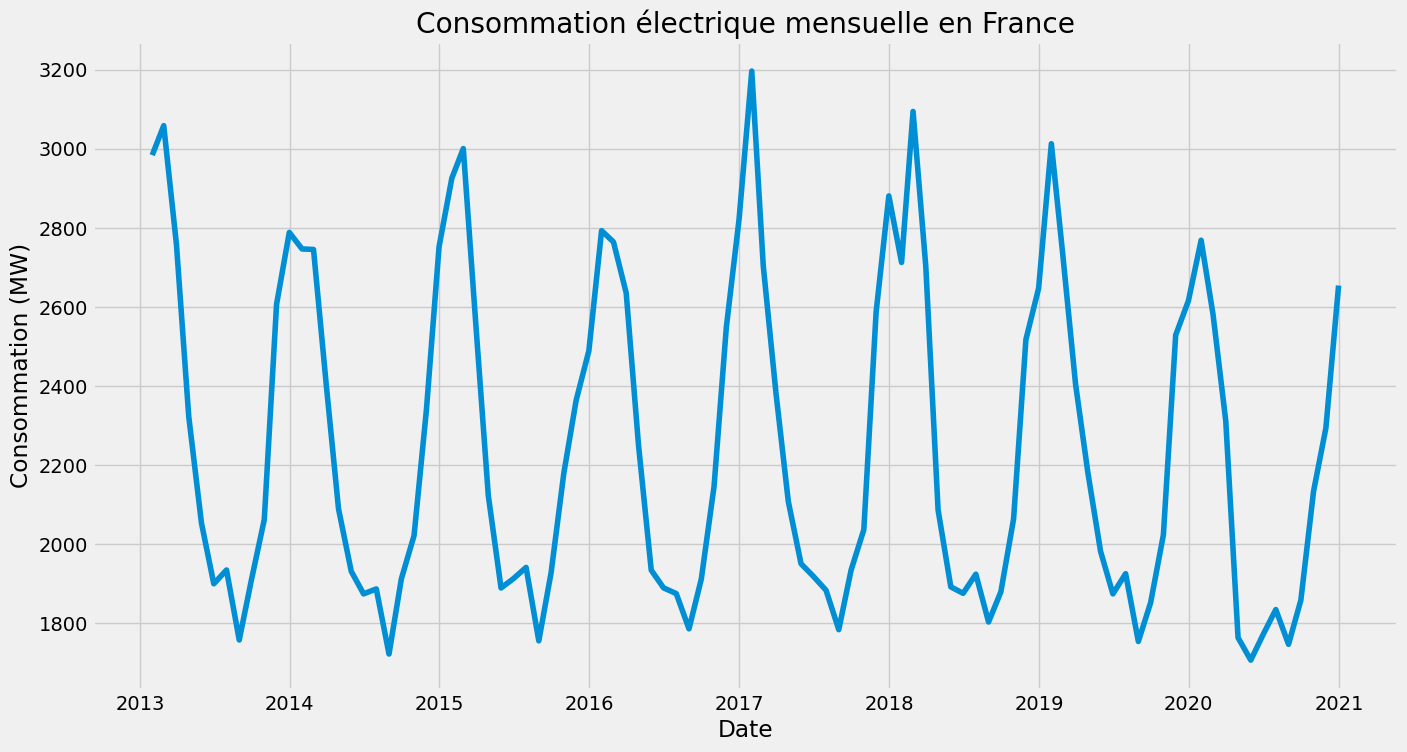

In [37]:
plt.figure(figsize =(15,8))
plt.plot(df_monthly_mean)
plt.xlabel("Date")
plt.ylabel("Consommation (MW)")
plt.title("Consommation électrique mensuelle en France")
plt.show()

In [38]:
# perform seasonal decomposition on the time series
decomposition = seasonal_decompose(df_monthly_mean)

# access the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

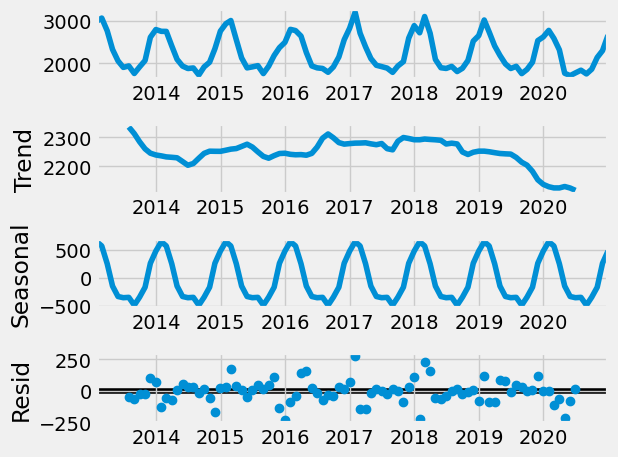

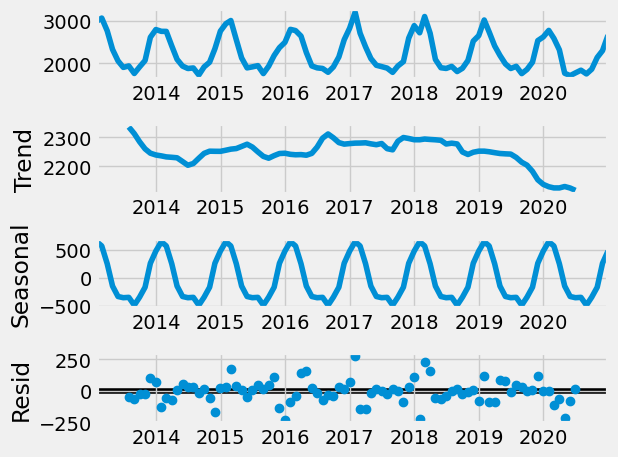

In [39]:
decomposition.plot()

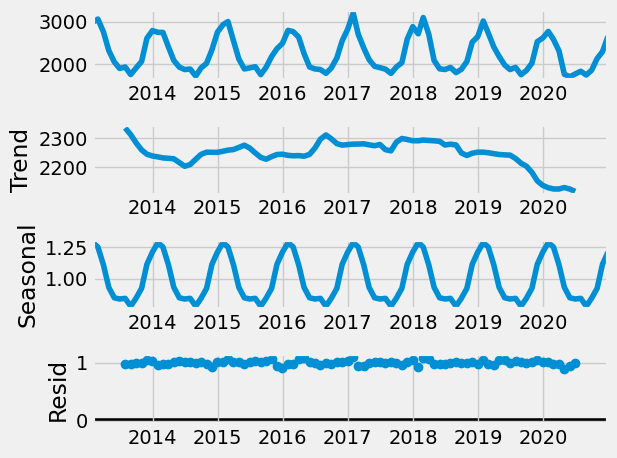

In [40]:
tsa = seasonal_decompose(df_monthly_mean, model ='multiplicative').plot()

In [41]:
# On observe ici que le modèle est multiplicatif

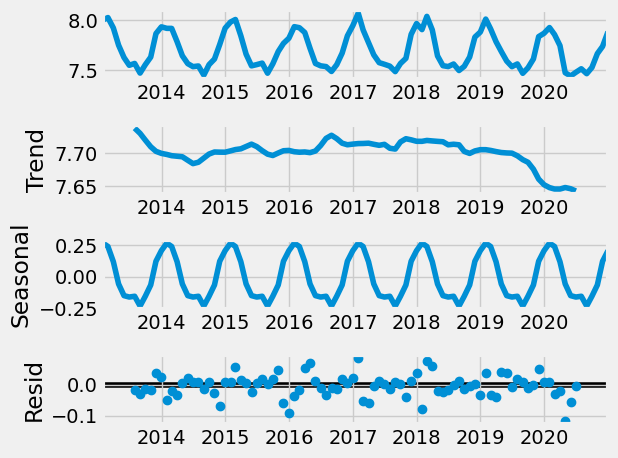

In [42]:
df_monthly_mean = np.log(df_monthly_mean)
TSA = seasonal_decompose(df_monthly_mean).plot()

In [43]:
#Le passage au log() permet de transformé notre modele multiplicatif en modele additif  

In [44]:
#on verifie la stationnarité avec un test Dickey Fuller, le modele SARIMA ne s'appliquant qu'aux series stationnaires
result = adfuller(df_monthly_mean.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#La p-value étant supérieure à 0.05 on ne peut pas rejeter l'hypothese nulle et considérer la serie comme stationnaire

ADF Statistic: -0.878569
p-value: 0.794948


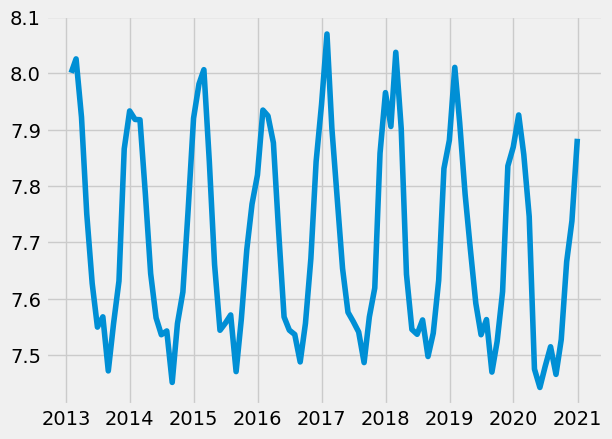

In [45]:
plt.plot(df_monthly_mean);

In [46]:
# Méthode Box-Jenkins permettant de choisir le modèle et Differenciation afin stationnariser la série  

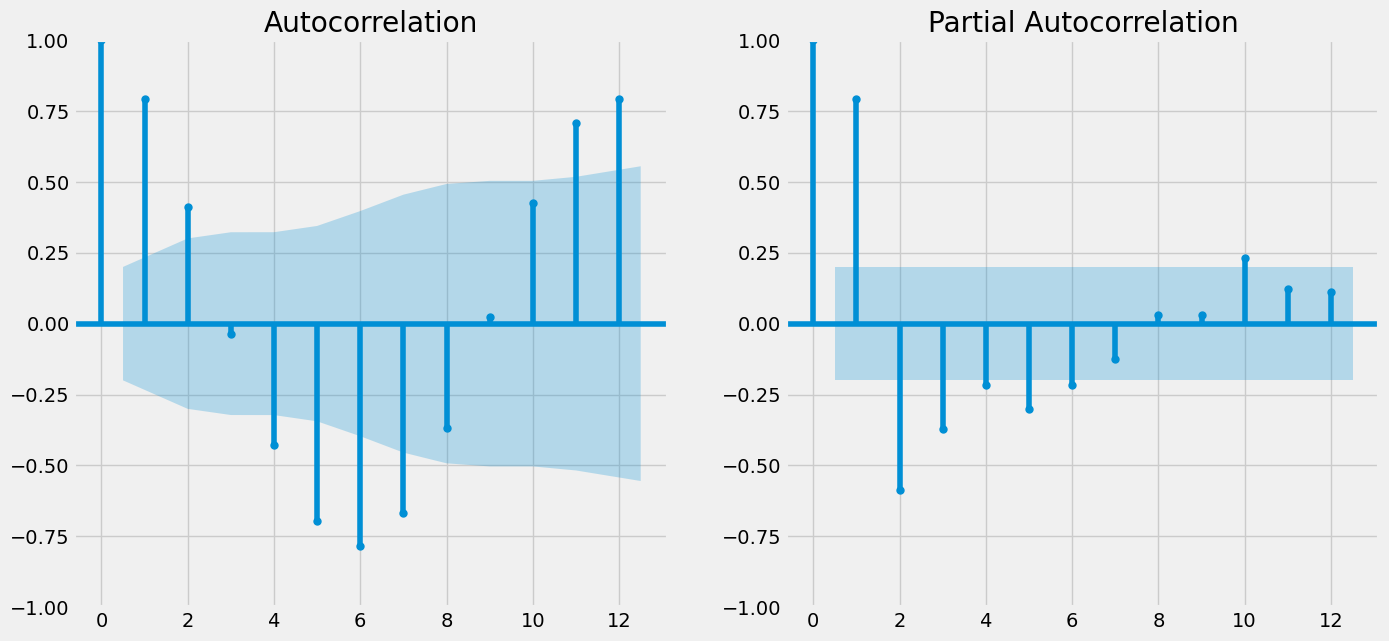

In [47]:
fig = plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
plot_acf(df_monthly_mean, lags=12, ax=ax1)
plot_pacf(df_monthly_mean, lags=12, ax=ax2, method='ywm')
plt.show();

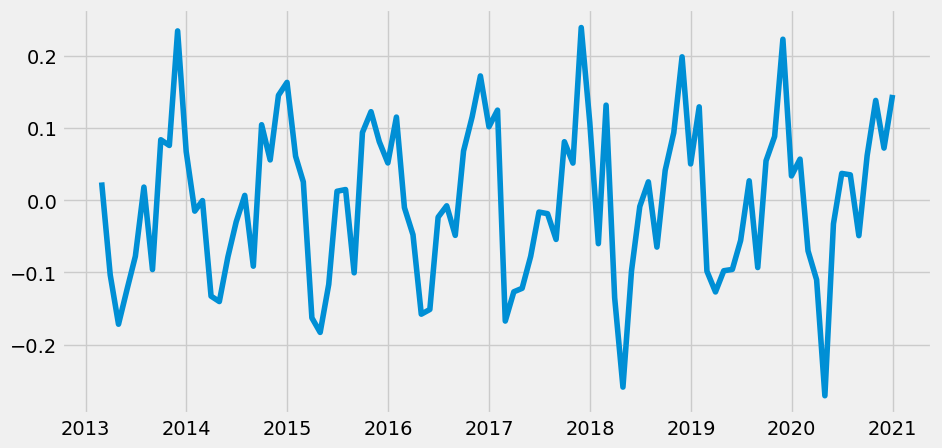

In [48]:
plt.figure(figsize = (10,5))
plt.plot(df_monthly_mean.diff());

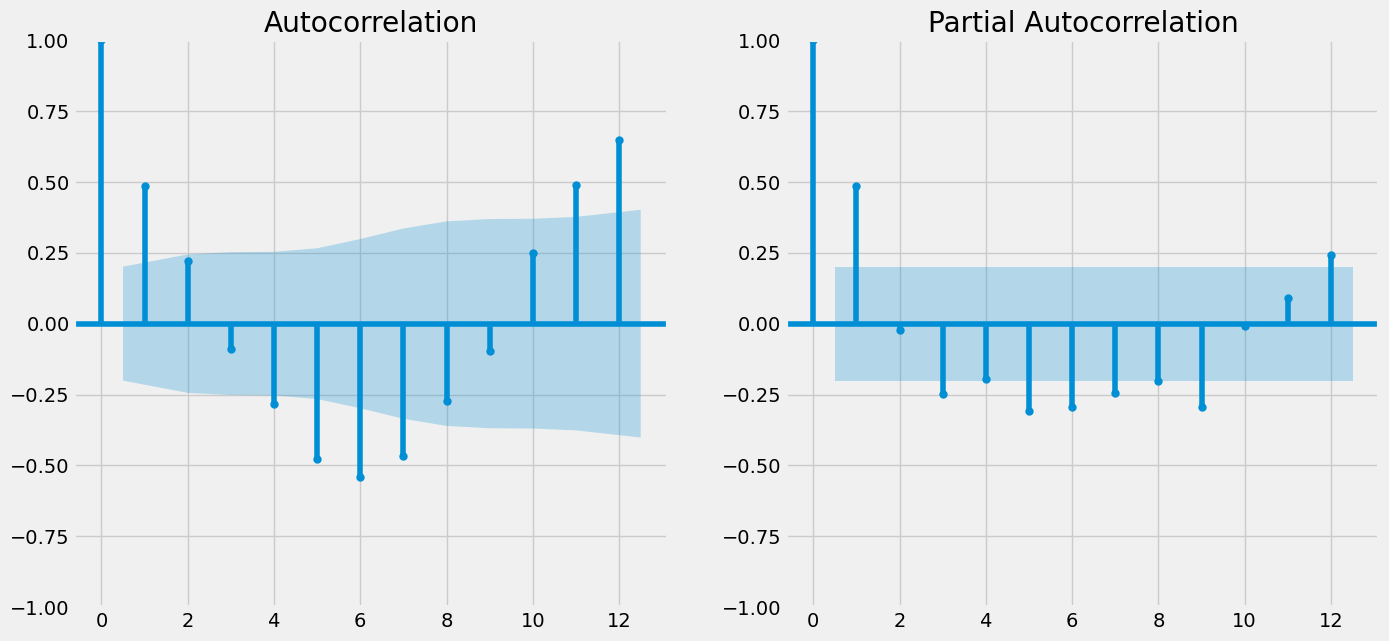

In [49]:
fig = plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
plot_acf(df_monthly_mean.diff().dropna(), lags=12, ax=ax1)
plot_pacf(df_monthly_mean.diff().dropna(), lags=12, ax=ax2,method='ywm')
plt.show();

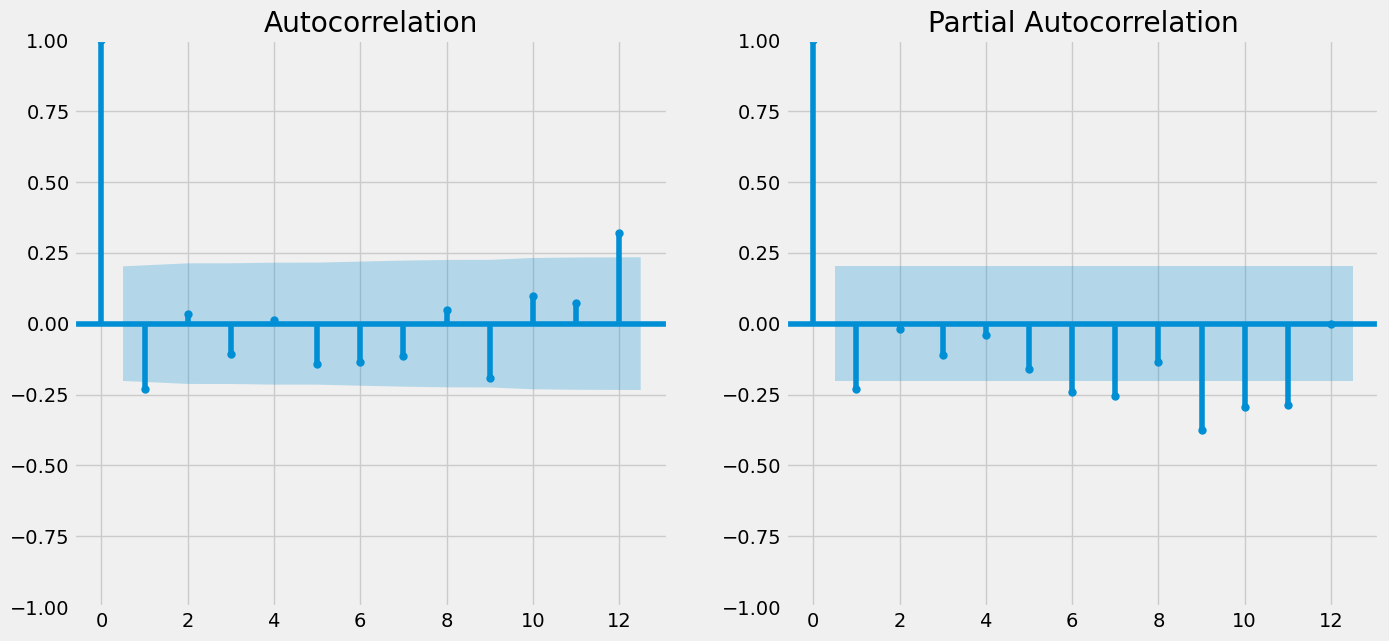

In [50]:
fig = plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
plot_acf(df_monthly_mean.diff().diff().dropna(), lags=12, ax=ax1)
plot_pacf(df_monthly_mean.diff().diff().dropna(), lags=12, ax=ax2,method='ywm')
plt.show();

In [51]:
result = adfuller(df_monthly_mean.diff().diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.774446
p-value: 0.000000


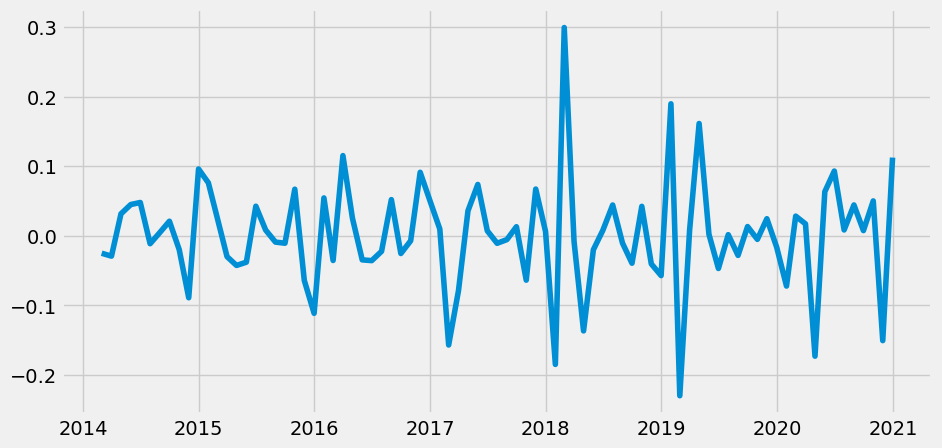

In [52]:
plt.figure(figsize =(10,5))
plt.plot(df_monthly_mean.diff().diff(12));

Modèle SARIMA :

In [53]:
import statsmodels.api as sm
modele = sm.tsa.SARIMAX(df_monthly_mean,order = (0,0,0), seasonal_order= (0,1,1,12))
sarima = modele.fit()
print(sarima.summary())

                                 SARIMAX Results                                  
Dep. Variable:          Consommation (MW)   No. Observations:                   96
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                 122.175
Date:                    Wed, 08 Mar 2023   AIC                           -240.349
Time:                            17:50:43   BIC                           -235.488
Sample:                        01-31-2013   HQIC                          -238.395
                             - 12-31-2020                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8002      0.219     -3.650      0.000      -1.230      -0.371
sigma2         0.0028      0.000      8.116      0.000       0.002       0.003
Ljung-Box (L1) (Q): 

In [54]:
modele = sm.tsa.SARIMAX(df_monthly_mean,order = (0,1,1), seasonal_order= (1,1,1,12))
sarima = modele.fit()
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Consommation (MW)   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 131.496
Date:                            Wed, 08 Mar 2023   AIC                           -254.991
Time:                                    17:50:44   BIC                           -245.316
Sample:                                01-31-2013   HQIC                          -251.104
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6618      0.087     -7.637      0.000      -0.832      -0.492
ar.S.L12      -0.3527      0.151   

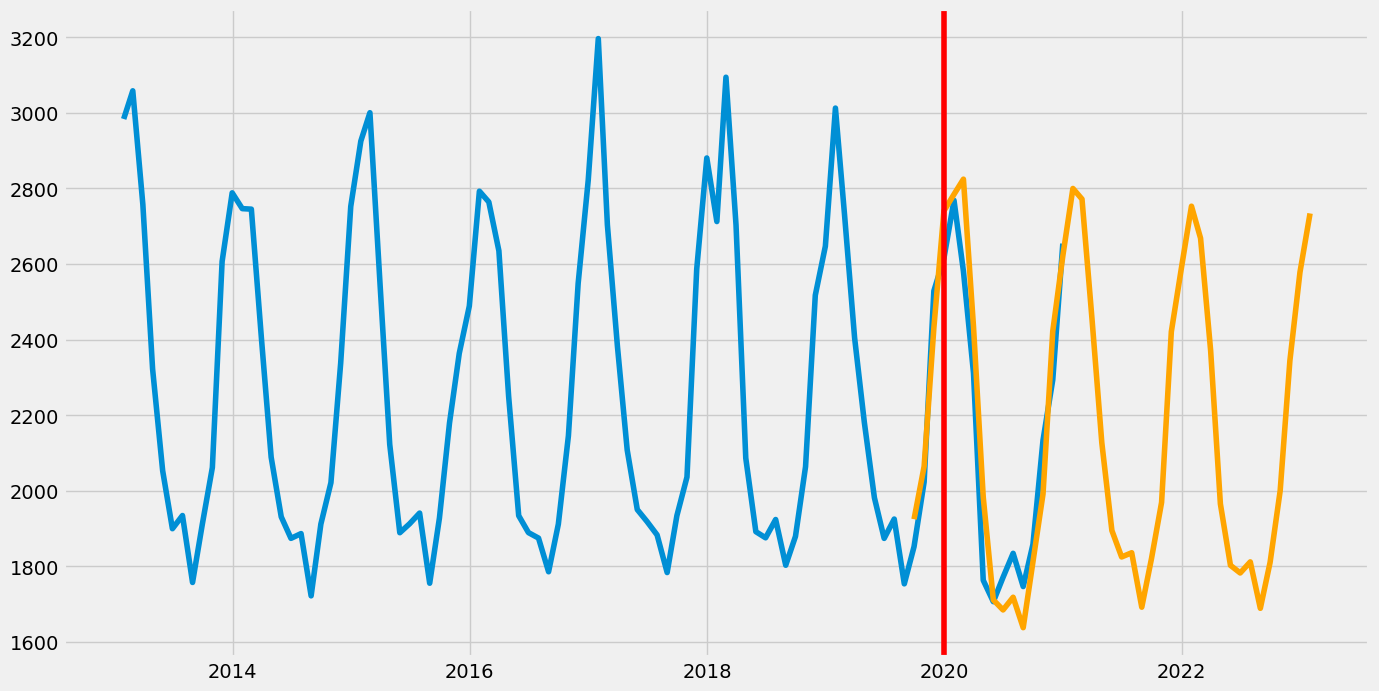

In [55]:

plt.figure(figsize=(15,8))
df_monthly_mean = np.exp(df_monthly_mean)
pred = np.exp(sarima.predict(80,120))
plt.plot(df_monthly_mean)
plt.plot(pred,color = 'orange')
plt.axvline(x = datetime.date(2019,12,31),color = 'red');

In [56]:
print("Le modele SARIMA nous permet d'observer une tendance à la baisse de la comsommation énergetique en France. Aujourd'hui la consommation n'as pas diminué, mais on peut facilement expliquer ces resultats avec le contexte mondial 2019/2020.")
print("Cette variation inattendue de la consommation entraine des difficultés à predire les futurs besoins energetiques, et est donc un facteur favorisant le risque de black out")




Le modele SARIMA nous permet d'observer une tendance à la baisse de la comsommation énergetique en France. Aujourd'hui la consommation n'as pas diminué, mais on peut facilement expliquer ces resultats avec le contexte mondial 2019/2020.
Cette variation inattendue de la consommation entraine des difficultés à predire les futurs besoins energetiques, et est donc un facteur favorisant le risque de black out
